## Importar librerias a utilizar

In [80]:
# Manipulacion de datos
import pandas as pd
import numpy as np

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# MODELOS
import sklearn as skt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, ElasticNetCV, LassoCV # para regresion lineal multiple y regularizacion
from sklearn.linear_model import SGDRegressor # para gradientes
from sklearn.linear_model import LogisticRegression # regresion logistica
from sklearn.preprocessing import LabelEncoder#variables categoricas

# Redes Neuronales
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
!pip install optuna
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# split y pipeline para entrenamiento de modelos
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Metricas de los modelos
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import pearsonr
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_fscore_support

# Escalado de datos
from sklearn.preprocessing import RobustScaler # pruebas
from sklearn.preprocessing import StandardScaler # usado

# Balance de modelos
from imblearn.over_sampling import RandomOverSampler, SMOTE

# ignorar warnings
import warnings
warnings.filterwarnings("ignore")

#Almacenar Modelo
!pip install streamlit
import streamlit as st
import joblib

#shap
!pip install shap
import shap



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 6.1 MB/s eta 0:00:00


## Lectura del dataset y primer analisis

In [31]:
df = pd.read_csv("/content/weatherAUS.csv", delimiter=",")

In [5]:
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

In [32]:
#-----------# Filtrado de localidad y eliminacion de columna Unnamed: 0#-----------#

localidades = ["SydneyAirport", "Sydney", "Canberra", "Melbourne", "MelbourneAirport" ]

# Filtrado del dataset por localidad SydneyAirport
df_filtrado = df[df['Location'].isin(localidades)]

# Eliminar la columna 'Unnamed: 0'
df_filtrado = df_filtrado.drop('Unnamed: 0', axis=1)
df_filtrado = df_filtrado.drop('Date',axis=1) #eliminamos la fecha para evitar data leakage
df_filtrado = df_filtrado.drop('Location',axis=1) #eliminamos la locacion porque no suma

df_filtrado.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30167,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0
30168,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6
30169,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8
30170,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4
30171,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6


In [7]:
df_filtrado.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000
mean,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,2.302586
std,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,7.385251
min,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000
50%,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000
75%,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.800000
max,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


Objetivo

Familiarizarse con la librería scikit-learn y las herramientas que brinda para el pre-procesamiento de datos, la implementación de modelos y la evaluación de métricas, y con TensorFlow para el entrenamiento de redes neuronales.

Dataset

El dataset se llama weatherAUS.csv y contiene información climática de Australia de los últimos diez años, incluyendo si para el día siguiente llovió o no y la cantidad de lluvia en las columnas ‘RainTomorrow’ y ‘RainfallTomorrow’. El objetivo es la predicción de estas dos variables en función del resto de las características que se consideren adecuadas.

Tiene una columna ‘Location’ que indica la ciudad y el objetivo es predecir la condición de lluvia en las ciudades de Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport (costa sureste). Pueden considerarse como una única ubicación. Descartar el resto de los datos.


## Tratamiento de datos faltantes

In [8]:
# Verificar cantidad de datos que faltan por columnas
df_filtrado.isna().sum()

MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

In [33]:
#------------# Aplicacion de medidas para datos faltantes #------------#

# Eliminar filas vacias del dataframe RainTomorrow y RainfallTomorrow
df_filtrado = df_filtrado.dropna(subset=['RainTomorrow', 'RainfallTomorrow'])

"""
Explicacion:
RainTomorrow y RainfallTomorrow son variables que queremos predecir por eso al tener datos
faltantes no podemos inventarnos valores o repetirlos, debemos eliminar esas filas ya que no
hay forma de rellenarlos.
"""

df_filtrado.isna().sum()

MinTemp               10
MaxTemp                6
Rainfall             163
Evaporation         1694
Sunshine            1939
WindGustDir         1445
WindGustSpeed       1443
WindDir9am           678
WindDir3pm           289
WindSpeed9am         260
WindSpeed3pm         249
Humidity9am           88
Humidity3pm           45
Pressure9am          253
Pressure3pm          245
Cloud9am            2041
Cloud3pm            2282
Temp9am               24
Temp3pm               16
RainToday            163
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

In [34]:
# Crear funcion para rellenar datos segun corresponda
def rellenar(dataframe):

    for columna in dataframe.columns:

        # Verifica si la columna tiene datos faltantes
        if dataframe[columna].isnull().any():

            # Si es numérica y continua, rellena con el promedio
            if pd.api.types.is_numeric_dtype(dataframe[columna]) and not pd.api.types.is_integer_dtype(dataframe[columna]):
                dataframe[columna].fillna(dataframe[columna].mean(), inplace=True)

            # Si es numérica y discreta, rellena con la moda
            elif pd.api.types.is_numeric_dtype(dataframe[columna]):
                dataframe[columna].fillna(dataframe[columna].mode()[0], inplace=True)

           # Si es categórica, rellena con la moda
            else:
                dataframe[columna].fillna(dataframe[columna].mode()[0], inplace=True)

    return dataframe

In [35]:
# Rellena columnas
df1 = rellenar(df_filtrado)

# Reiniciar index
df1 =  df1.reset_index(drop = True)

df1.isna().sum()

MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
RainfallTomorrow    0
dtype: int64

## Analisis descriptivo

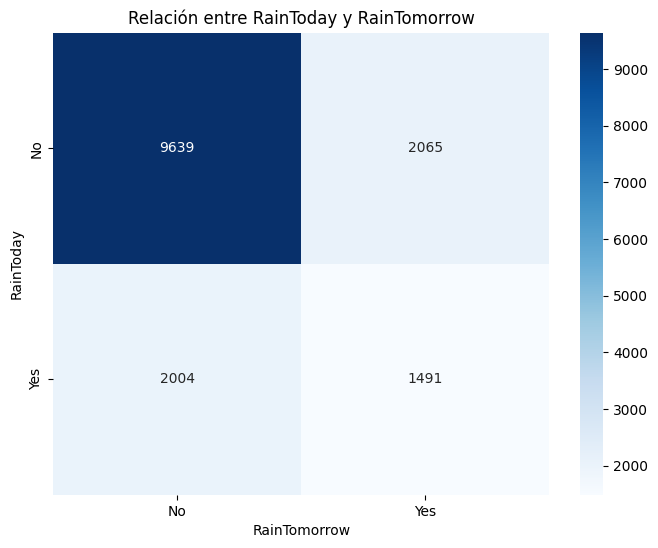

In [36]:
# Guarda las columnas categóricas y numericas
#columnas_categoricas = df1.select_dtypes(exclude='number').columns
#columnas_numericas = df1.select_dtypes(include='number').columns


# Ver influencia de RainToday en RainTomorrow
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df1['RainToday'], df1['RainTomorrow'])

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Crear un heatmap de la tabla de contingencia
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')

# Ajustes de diseño
plt.title('Relación entre RainToday y RainTomorrow')
plt.xlabel('RainTomorrow')
plt.ylabel('RainToday')

plt.show()

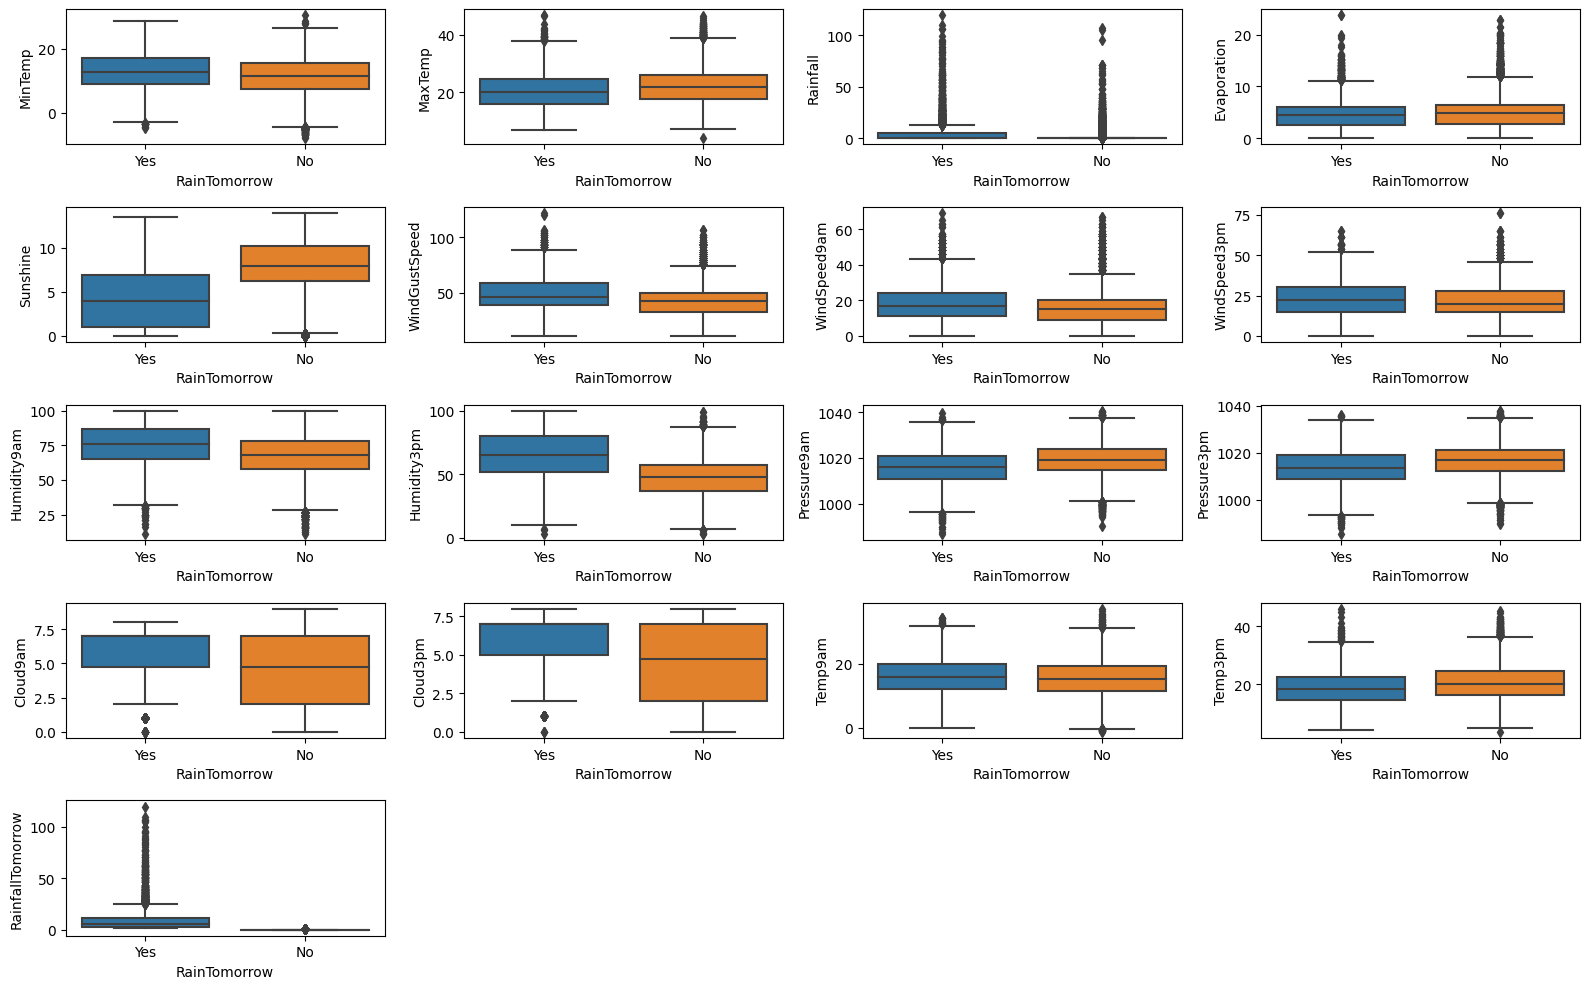

In [37]:
#Gráfico de Boxplot
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de cajas para cada variable numérica
for i, column in enumerate(columnas_numericas):
    plt.subplot(5, 4, i+1)
    sns.boxplot(x='RainTomorrow', y=column, data=df1)

# Ajustes de diseño
plt.tight_layout()
plt.show()

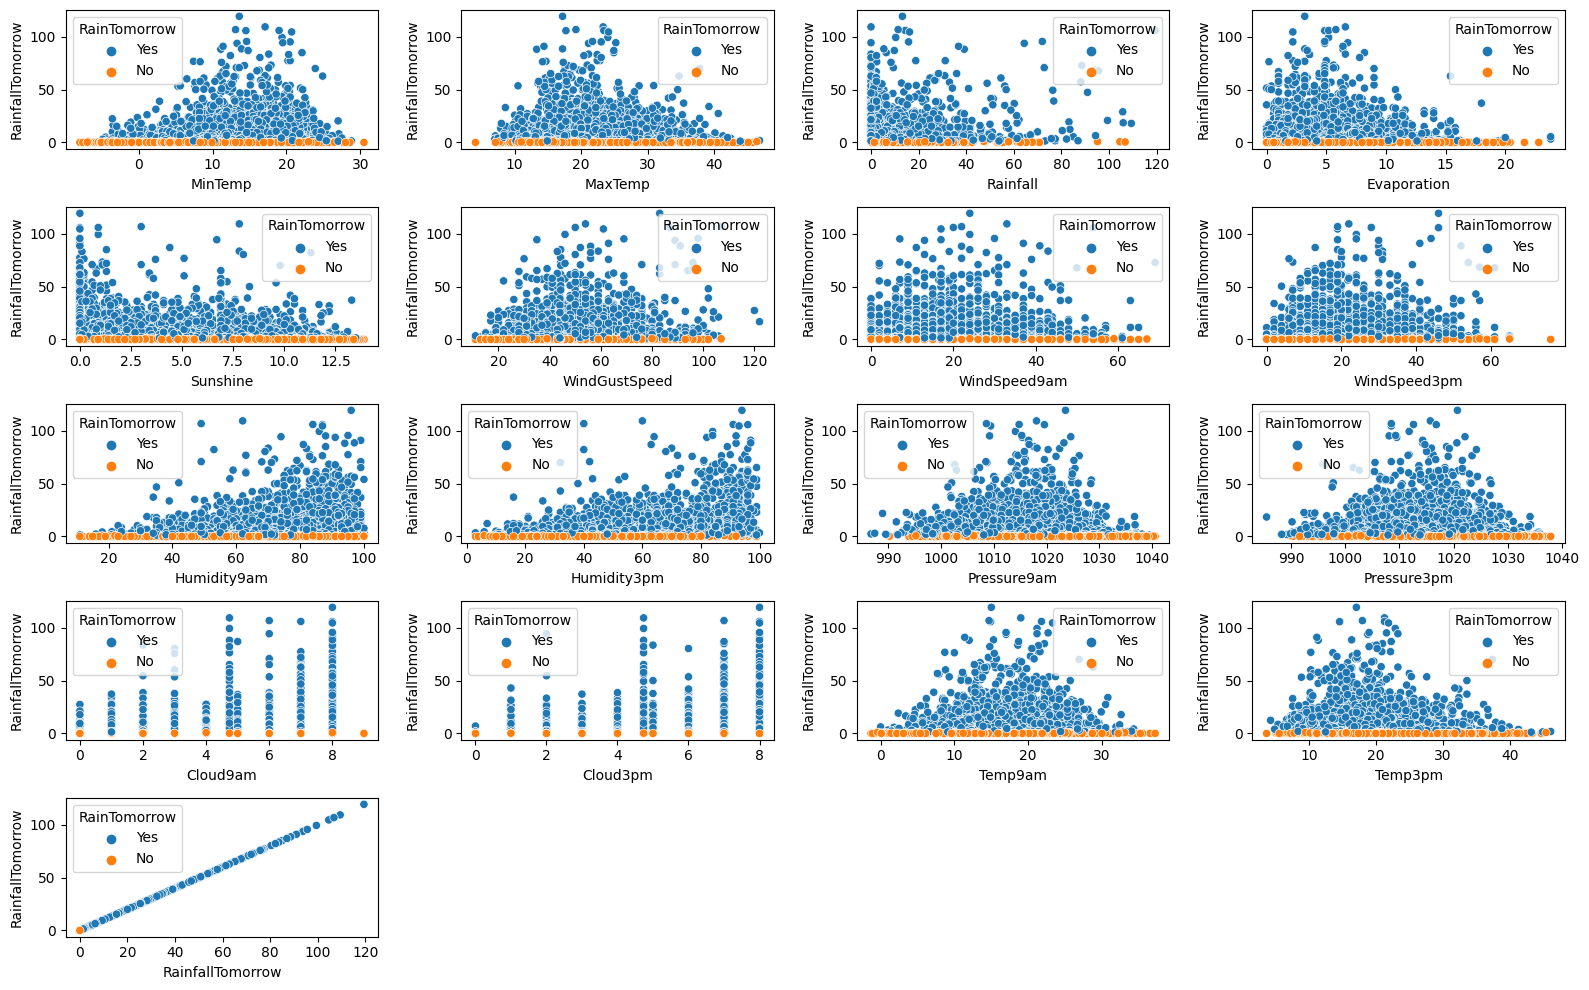

In [20]:
# Configurar el tamaño de la figura
plt.figure(figsize=(16, 10))

# Crear subgráficos de disperción para cada variable numérica
for i, column in enumerate(columnas_numericas):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(x=column,y='RainfallTomorrow',hue='RainTomorrow', data=df1)

# Ajustes de diseño
plt.tight_layout()
plt.show()

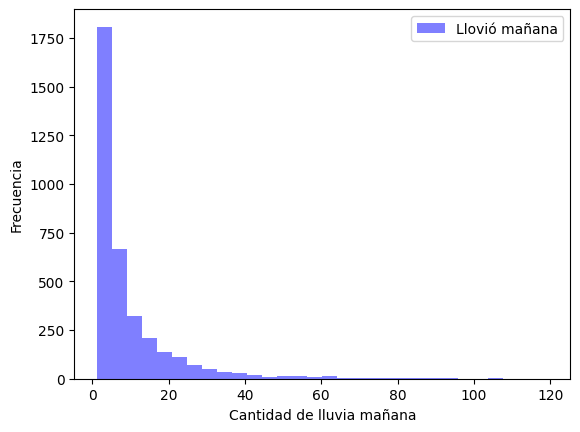

In [38]:
# Crear un histograma para la columna 'RainTomorrow'
plt.hist(df1[df1['RainTomorrow'] == 'Yes']['RainfallTomorrow'], bins=30, alpha=0.5, label='Llovió mañana', color='blue')

# Añadir etiquetas y leyenda
plt.xlabel('Cantidad de lluvia mañana')
plt.ylabel('Frecuencia')
plt.legend()

# Mostrar el histograma
plt.show()

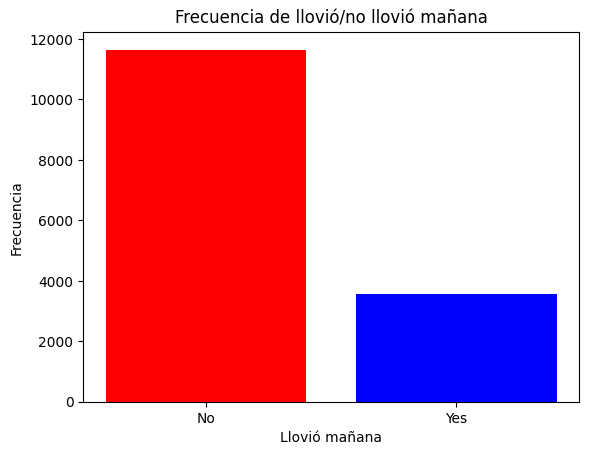

In [39]:
# Contar la frecuencia de 'RainTomorrow'
conteo_lluvia = df1['RainTomorrow'].value_counts()

# Crear un gráfico de barras
plt.bar(conteo_lluvia.index, conteo_lluvia, color=['red', 'blue'])

# Añadir etiquetas y título
plt.xlabel('Llovió mañana')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de llovió/no llovió mañana')

# Mostrar el gráfico de barras
plt.show()

## Paso de columnas categoricas a numericas

In [64]:
df_categorica=df1.copy()


# Aplicar codificación de etiqueta

le = LabelEncoder()
for categorica in columnas_categoricas:
 df_categorica[categorica] = le.fit_transform(df_categorica[categorica])

df_categorica.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,19.5,22.4,15.6,6.200000,0.0,3,44.323786,8,11,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,6.0
1,19.5,25.6,6.0,3.400000,2.7,3,44.323786,13,0,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,6.6
2,21.6,24.5,6.6,2.400000,0.1,3,44.323786,2,2,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,18.8
3,20.2,22.8,18.8,2.200000,0.0,3,44.323786,5,0,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,77.4
4,19.7,25.7,77.4,4.869108,0.0,3,44.323786,5,13,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,1.6


##Matriz de correlación

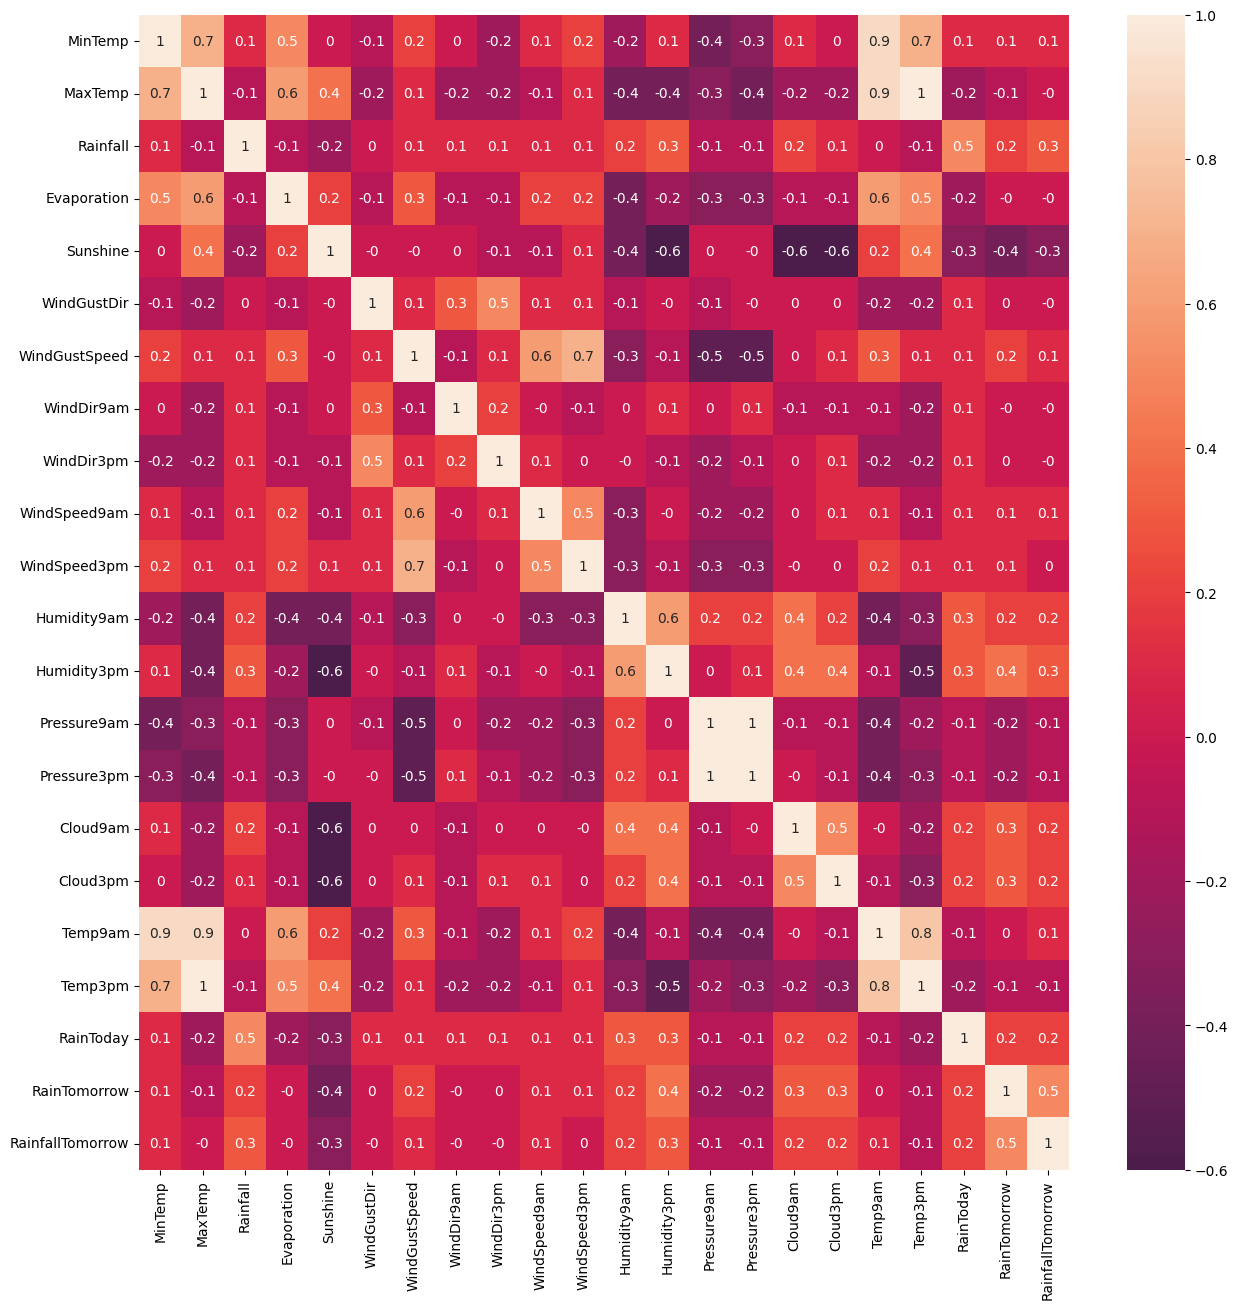

In [42]:
corr = df_categorica.corr().round(1)
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="rocket", center=0)
plt.show()

# Modelos IA

## Division de datos

In [65]:
#------------# Estandarizacion de datos #------------#

# Copia del dataset
regresion = df_categorica.copy()

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Filtrar el DataFrame con las columnas seleccionadas
df_regresion = regresion.drop(['RainTomorrow', 'RainfallTomorrow'], axis=1)

#------------# Datos regresion #------------#

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train_R, X_test_R, Y_train_R, Y_test_R = train_test_split(
    df_regresion,
    regresion['RainfallTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Ajustar el scaler a los datos y transformarlos
X_train_R = scaler.fit_transform(X_train_R)
X_test_R = scaler.transform(X_test_R)




#------------# Datos clasificacion #------------#

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train_C, X_test_C, Y_train_C, Y_test_C = train_test_split(
    df_regresion,
    regresion['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Ajustar el scaler a los datos y transformarlos
X_train_C = scaler.fit_transform(X_train_C)
X_test_C = scaler.transform(X_test_C)


# Implementar la solución del problema de regresión con regresión lineal múltiple

## LinearRegression

Error cuadrático medio en entrenamiento: 40.882791420013014
Error cuadrático medio en predicciones: 48.78116395095341
Error absoluto medio en predicciones: 3.189219945225647
Intercept: [2.28762234]
Coeficientes: [[-0.57440674  0.59559295  1.12501892  0.17675378 -1.09248852 -0.08847214
   1.54120786  0.15373494  0.26711524 -0.10244801 -0.68770951 -0.22887388
   2.66119465  2.03967214 -2.14008722 -0.3118357   0.1379565  -0.05144968
   0.69886802  0.1620535 ]]
R2: 0.24110259259460842


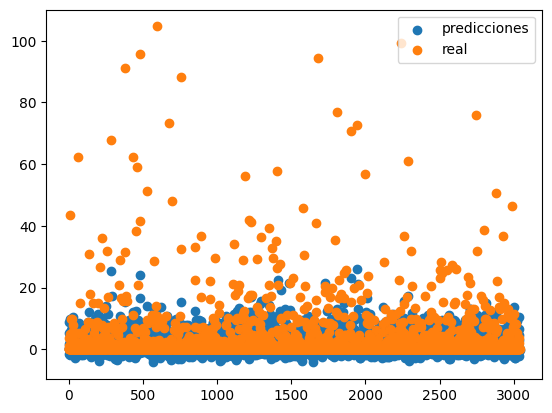

In [44]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train_R, Y_train_R)

# Hacer predicciones sobre el conjunto de prueba
predictions_train = model.predict(X_train_R)
predictions_test = model.predict(X_test_R)

# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train_R, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test_R, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test_R, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test_R, Y_test_R))

x=range(len(Y_test_R))
plt.scatter(x, y=predictions_test, label='predicciones')
plt.scatter(x, y=Y_test_R, label='real')
plt.legend()
plt.show()

# Metrica para comparar
mse_regresion_simple = mean_squared_error(Y_test_R, predictions_test)

# metodos de gradiente

## Gradiente estocaico


Error cuadrático medio en entrenamiento: 41.654097396635535
Error cuadrático medio en predicciones: 49.91914881040853
Error absoluto medio en predicciones: 3.083473240339081
Intercept: [2.23259999]
Coeficientes: [-6.85444054e-01  6.66202508e-01  1.03604820e+00  2.13534303e-03
 -8.25865382e-01 -6.55288206e-02  1.70173119e+00 -1.50451220e-01
  3.59483979e-01 -1.58402723e-01 -5.37458320e-01 -2.95456402e-01
  2.43506559e+00  2.17543143e+00 -1.92790620e+00 -3.60003181e-01
  8.62376875e-02 -7.91049187e-02  8.51488201e-01 -1.02922674e-02]
R2: 0.22339875591749692


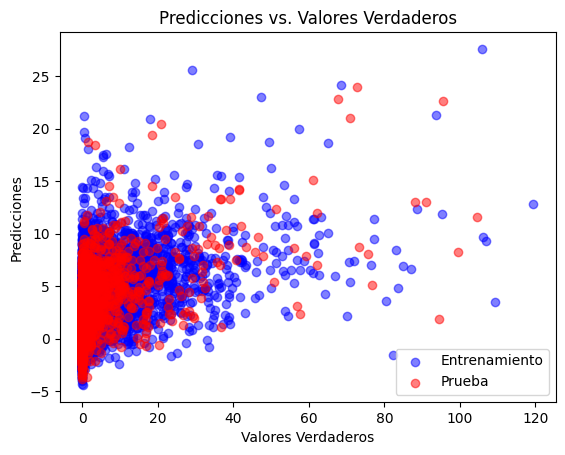

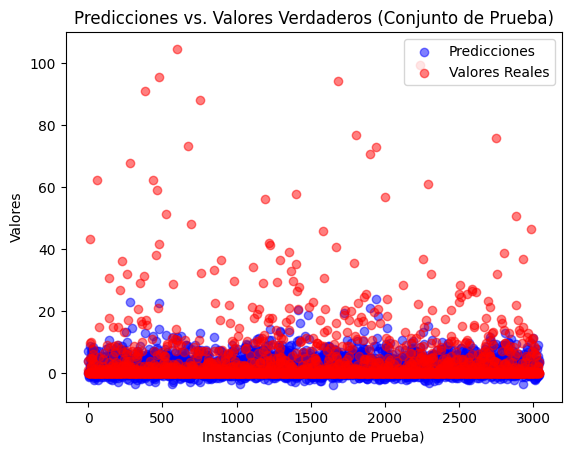

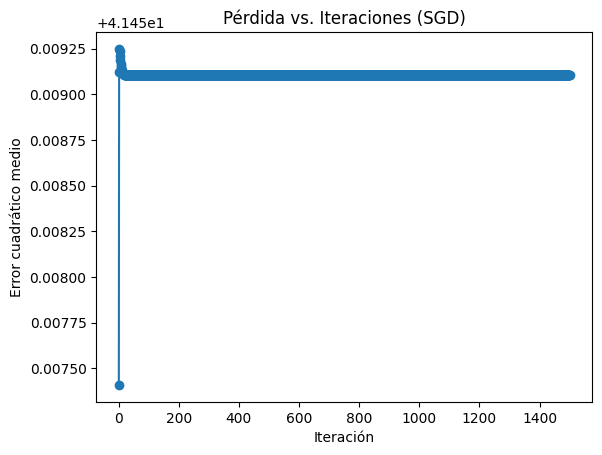

In [45]:
# metodo de gradiente estocaico por SGDRegressor
"""
Este modelo de regresion lineal ya implementa de forma interna el gradiente estocaico
"""

# Crear y entrenar el modelo de regresión lineal con SGD
#model = SGDRegressor(learning_rate='invscaling', eta0=0.01, max_iter=1000, random_state=42)
model = SGDRegressor(learning_rate='constant', eta0=0.001, max_iter=1500, random_state=42)
#model = SGDRegressor(learning_rate='adaptive',  max_iter=2500, random_state=42)
model.fit(X_train_R, Y_train_R)

# Hacer predicciones en los conjuntos de entrenamiento y prueba
predictions_train = model.predict(X_train_R)
predictions_test = model.predict(X_test_R)

# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train_R, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test_R, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test_R, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test_R, Y_test_R))

# Metrica para comparar
mse_gradiente_estocaico = mean_squared_error(Y_test_R, predictions_test)

# Visualizar predicciones vs. valores reales con colores diferentes
plt.scatter(Y_train_R, predictions_train, label='Entrenamiento', color='blue', alpha=0.5)
plt.scatter(Y_test_R, predictions_test, label='Prueba', color='red', alpha=0.5)
plt.xlabel('Valores Verdaderos')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Verdaderos')
plt.legend()
plt.show()


x_test = range(len(Y_test_R))

plt.scatter(x_test, predictions_test, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test_R, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()


# R2: 0.24192420458092878 learning_rate='invscaling', eta0=0.01, max_iter=1000, random_state=42
# R2: 0.24204824065946517 learning_rate='constant', eta0=0.001, max_iter=1500, random_state=42
# R2: 0.2411484031847133 learning_rate='adaptive',  max_iter=2500, random_state=42

# Listas para almacenar errores de entrenamiento
train_errors = []

# Entrenamiento del modelo y cálculo de errores
for i in range(model.max_iter):
    model.partial_fit(X_train_R, Y_train_R.ravel())  # Entrenamiento parcial
    train_predictions = model.predict(X_train_R)
    train_errors.append(metrics.mean_squared_error(Y_train_R, train_predictions))

# Visualizar pérdida vs. iteraciones
plt.plot(range(1, model.max_iter + 1), train_errors, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Error cuadrático medio')
plt.title('Pérdida vs. Iteraciones (SGD)')
plt.show()

## Gradiente mini batch

R2 Score (entrenamiento): 0.21514206619456433
R2 Score (prueba): 0.24052823440488424
MSE (entrenamiento): 40.89256279726314
MSE (prueba): 48.81808311913887
RMSE (entrenamiento): 6.394729298200444
RMSE (prueba): 6.986993854236518
MAE (entrenamiento): 3.0741904966381823
MAE (prueba): 3.1595750098350126


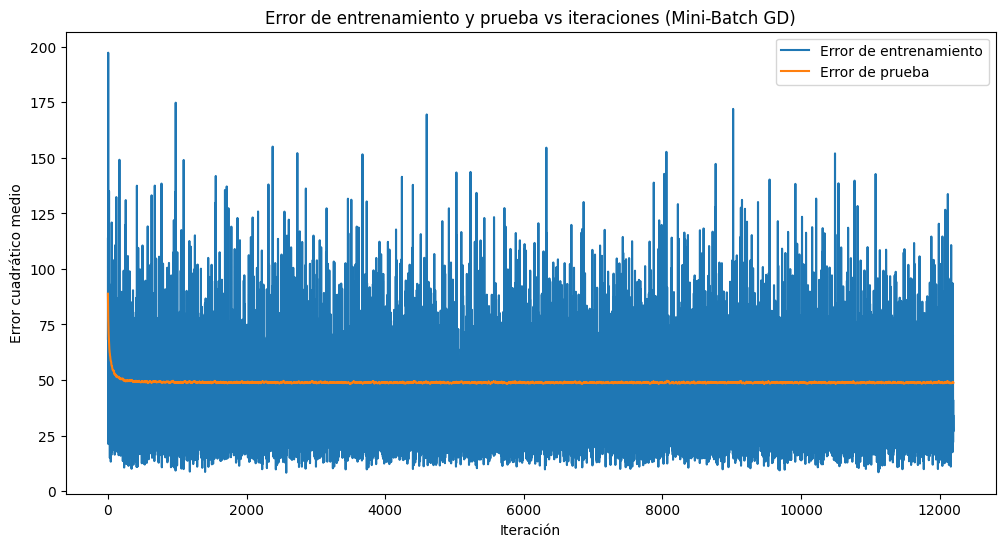

In [46]:
def mini_batch_gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100, batch_size=11):
    n = X_train.shape[0]
    m = X_train.shape[1]

    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

    W = np.random.randn(m + 1).reshape(-1, 1)

    train_errors = []
    test_errors = []

    for i in range(epochs):

        # Permutación aleatoria de los datos
        permutation = np.random.permutation(n)
        X_train = X_train[permutation]
        y_train = y_train[permutation]

        for j in range(0, n, batch_size):
            # Obtener un lote (mini-batch) de datos
            x_batch = X_train[j:j+batch_size, :]
            y_batch = y_train[j:j+batch_size].reshape(-1, 1)

            prediction = np.matmul(x_batch, W)
            error = y_batch - prediction
            train_mse = np.mean(error ** 2)
            train_errors.append(train_mse)

            gradient = -2 * np.matmul(x_batch.T, error) / batch_size

            W = W - (lr * gradient)

            prediction_test = np.matmul(X_test, W)
            error_test = y_test - prediction_test
            test_mse = np.mean(error_test ** 2)
            test_errors.append(test_mse)

    # Métricas de evaluación
    y_train_pred = np.matmul(X_train, W)
    y_test_pred = np.matmul(X_test, W)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

    print(f'R2 Score (entrenamiento): {r2_train}')
    print(f'R2 Score (prueba): {r2_test}')
    print(f'MSE (entrenamiento): {mse_train}')
    print(f'MSE (prueba): {mse_test}')
    print(f'RMSE (entrenamiento): {rmse_train}')
    print(f'RMSE (prueba): {rmse_test}')
    print(f'MAE (entrenamiento): {mae_train}')
    print(f'MAE (prueba): {mae_test}')

    plt.figure(figsize=(12, 6))
    plt.plot(train_errors, label='Error de entrenamiento')
    plt.plot(test_errors, label='Error de prueba')
    plt.xlabel('Iteración')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.title('Error de entrenamiento y prueba vs iteraciones (Mini-Batch GD)')
    plt.show()

    return W

# Utilizar el método con tus datos
mini_batch_gradient_descent(X_train_R, Y_train_R, X_test_R, Y_test_R, lr=0.01, epochs=200, batch_size= 200)

# Metrica para comparar
mse_gradiente_mini = 48.660835311015504


# regularizacion

## Ridge Regression


R2 Score: 0.24057176785172552
MSE: 48.81528483285275
RMSE: 6.986793601706919
MAE: 3.1851178505773303
Mejor valor de alpha encontrado: 28.66067616948256


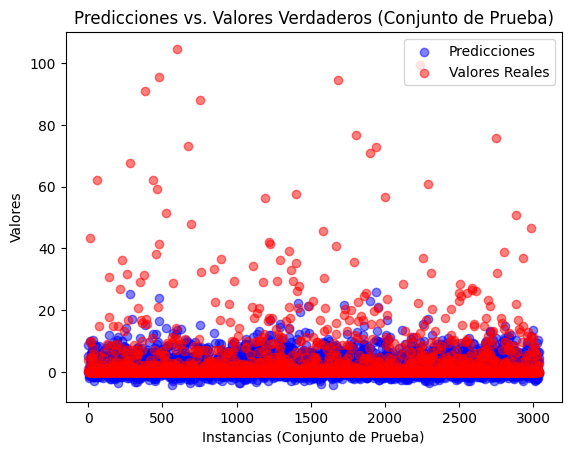

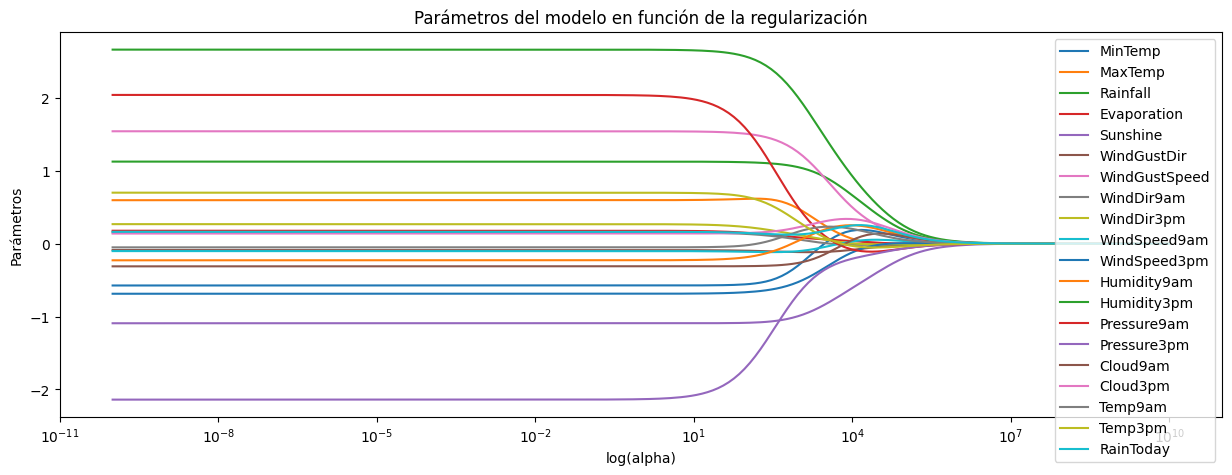

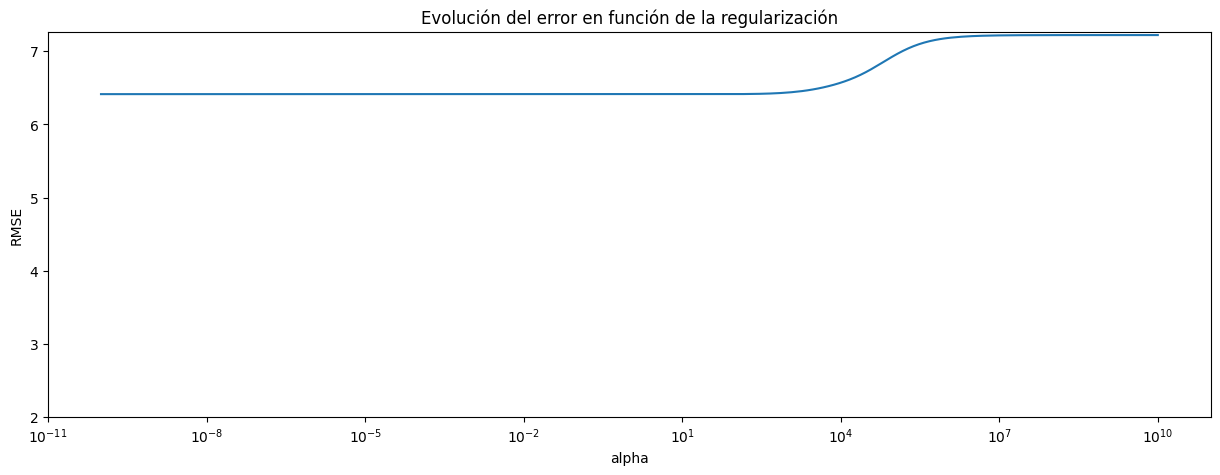

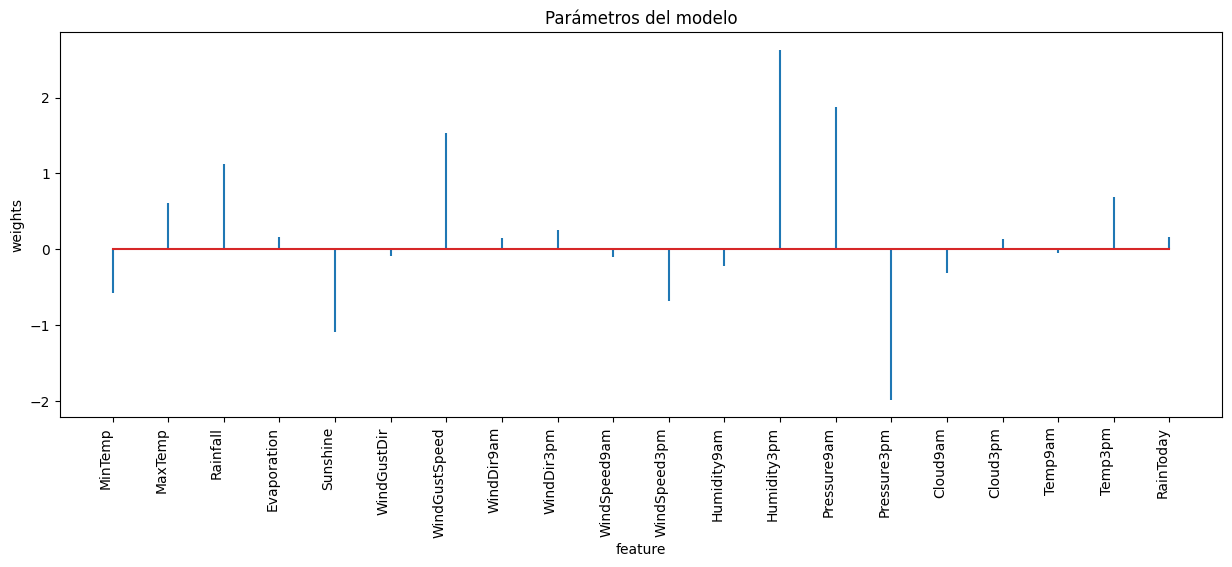

In [47]:
# Creación y entrenamiento del modelo. Scikit-Learn usa Cross Validation para encontrar el valor óptimo de alpha
# (lambda en los desarrollos de teoría). Puede ser problemático con series de tiempo.

modelo = make_pipeline(    RidgeCV(
                           alphas          = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo.fit(X_train_R, Y_train_R)

# Realizar predicciones
predictions = modelo.predict(X_test_R)


#-----------# Metricas #-----------#

# Calcular metricas
r2 = r2_score(Y_test_R, predictions)
mse = mean_squared_error(Y_test_R, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_R, predictions)

# Imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Mejor valor alpha encontrado
mod = modelo.steps[0][1]
print(f"Mejor valor de alpha encontrado: {mod.alpha_}")

#-----------# Graficas #-----------#
# Grafica predicciones vs reales

x_test = range(len(Y_test_R))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test_R, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()


# Evolución de los parámetros en función de alpha
alphas = modelo.steps[0][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(Ridge(alpha=alpha))
    modelo_aux.fit(X_train_R, Y_train_R)
    coefs.append(modelo_aux.named_steps['ridge'].coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=df_regresion.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización')
plt.axis('tight')
plt.legend()
plt.show()


# Evolución del error de validación cruzada en función de alpha
# nota: modelo.cv_values almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

# Coeficientes del modelo

df_coeficientes = pd.DataFrame({'predictor': df_regresion.columns,'coef': mod.coef_.flatten()})

fig, ax = plt.subplots(figsize=(15,5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');


# Metrica para comparar
mse_ridge = mean_squared_error(Y_test_R, predictions)


## Lasso Regression


R2 Score: 0.24083900462366925
MSE: 48.7981071212692
RMSE: 6.985564194914337
MAE: 3.184539413280876
Mejor valor de alpha encontrado: 0.0034489622604057598


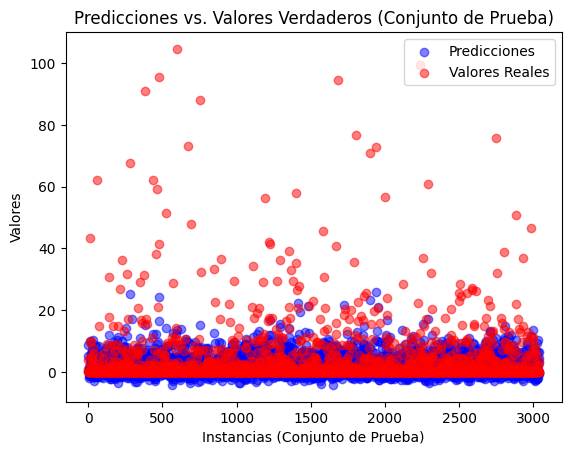

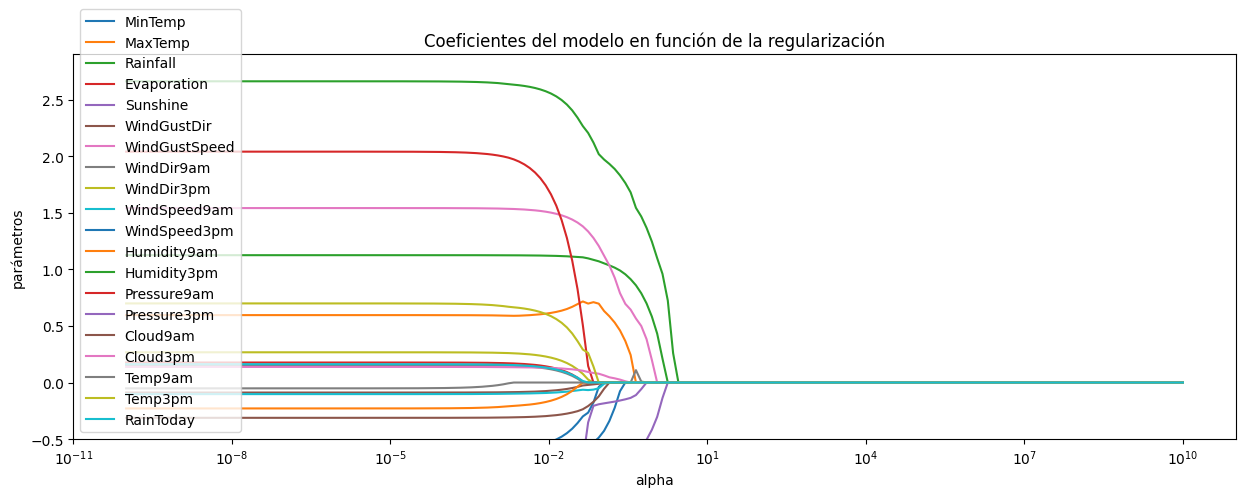

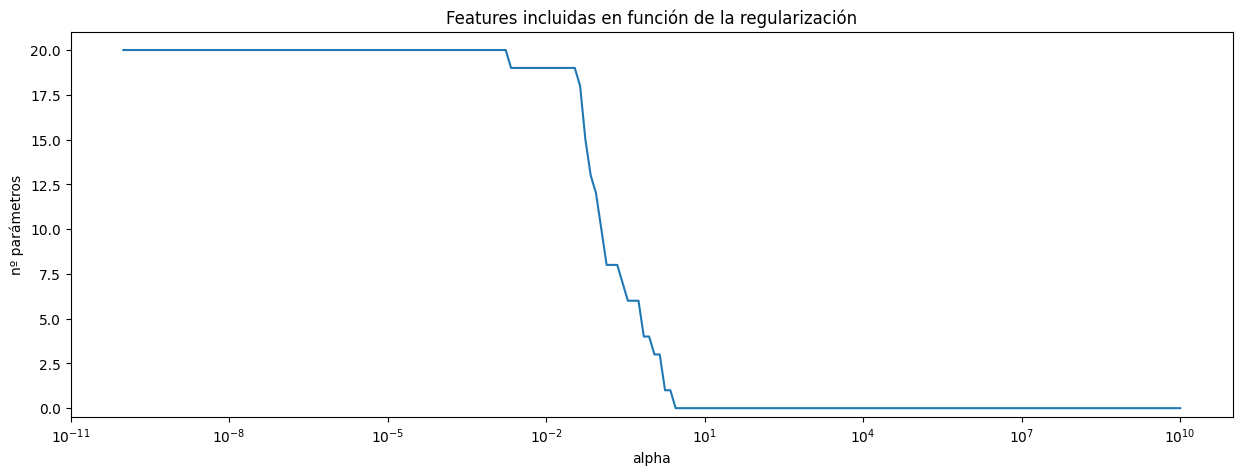

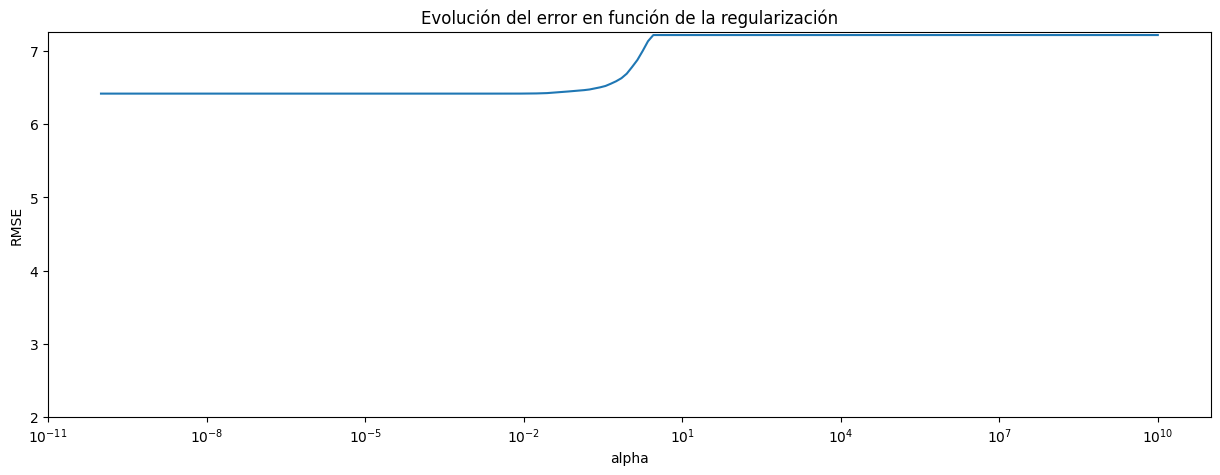

In [48]:
modelo = make_pipeline(    LassoCV(
                           alphas=np.logspace(-10, 10, 200),
                           cv=10
                        )
         )

_ = modelo.fit(X_train_R, Y_train_R)


# realizar predicciones
predictions = modelo.predict(X_test_R)

# Calcular metricas
r2 = r2_score(Y_test_R, predictions)
mse = mean_squared_error(Y_test_R, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_R, predictions)

#-----------# Metricas #-----------#
# imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Mejor valor alpha encontrado
mod = modelo.steps[0][1]
print(f"Mejor valor de alpha encontrado: {mod.alpha_}")



#-----------# Graficas #-----------#
x_test = range(len(Y_test_R))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test_R, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()

# Evolución de los parámetros en función de alpha

alphas = mod.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = make_pipeline(Lasso(alpha=alpha))
    modelo_aux.fit(X_train_R, Y_train_R)
    coefs.append(modelo_aux.steps[0][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=df_regresion.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

# Número de features incluidas (parámetros !=0) en función de alpha
n_predictores = []

for alpha in alphas:
    modelo_aux = make_pipeline(Lasso(alpha=alpha))
    modelo_aux.fit(X_train_R, Y_train_R)
    coef_no_cero = np.sum(modelo_aux.steps[0][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')


# Evolución del error de validación cruzada en función de alpha

# modelo.mse_path almacena el MSE de CV para cada valor de alpha.

mse_cv = mod.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()


# Metrica para comparar

mse_lasso = mean_squared_error(Y_test_R, predictions)


## ElasticNet

R2 Score: 0.2403814126815731
MSE: 48.82752067220799
RMSE: 6.987669187376287
MAE: 3.1834841842748767


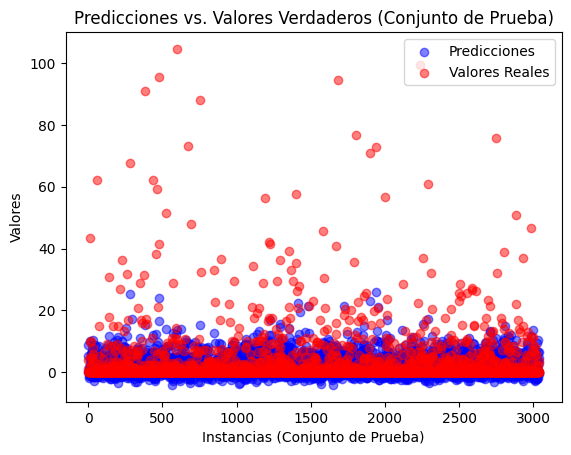

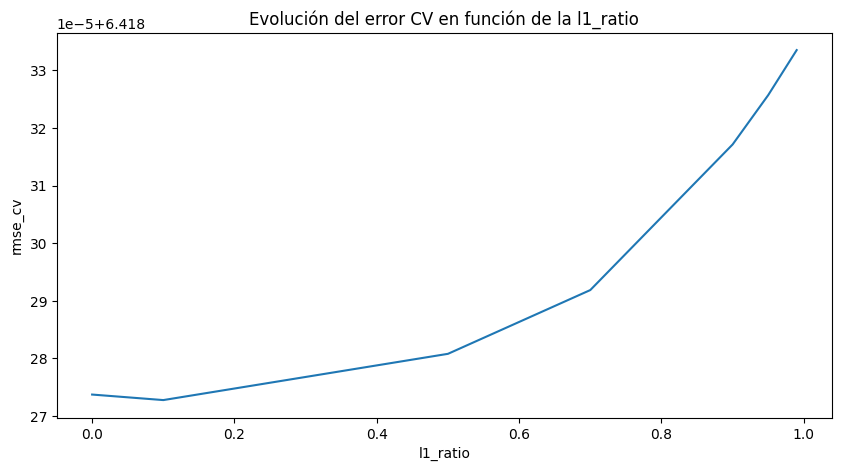

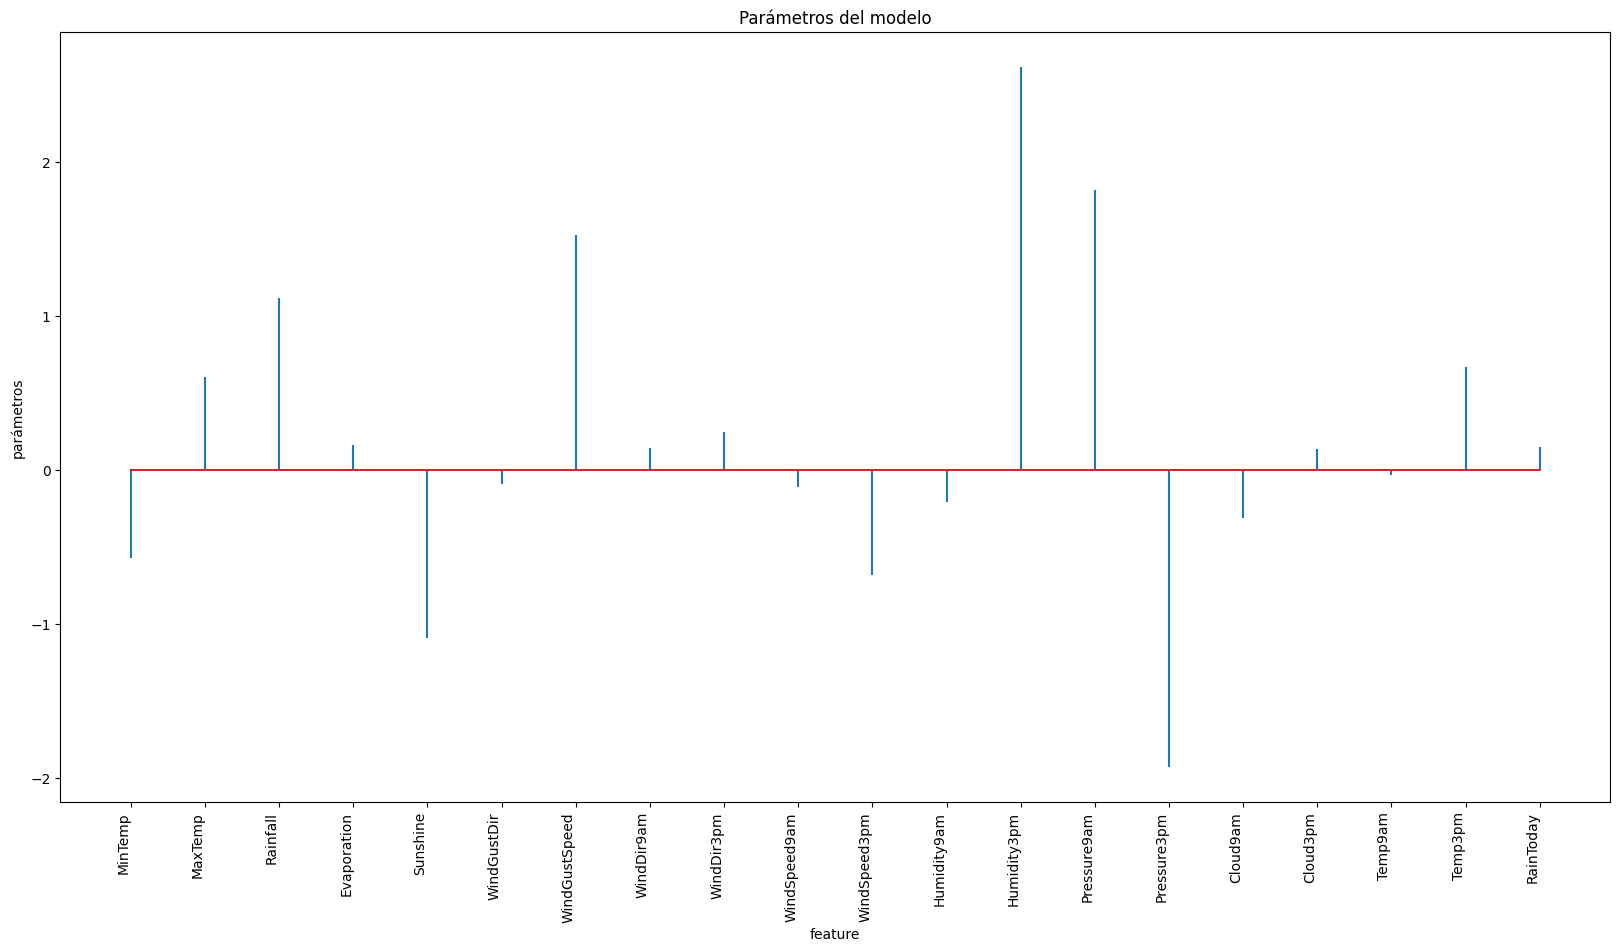

In [49]:
modelo = make_pipeline(       ElasticNetCV(
                              l1_ratio        = [0, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99],
                              alphas          = np.logspace(-10, 10, 200),
                              cv              = 10
                           )
         )

_ = modelo.fit(X_train_R, Y_train_R)

# Realizar predicciones
predictions = modelo.predict(X_test_R)

#-----------# Metricas #-----------#
# Calcular metricas
r2 = r2_score(Y_test_R, predictions)
mse = mean_squared_error(Y_test_R, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test_R, predictions)

# Imprimir metricas
print(f'R2 Score: {r2}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


#-----------# Graficas #-----------#
mod = modelo.steps[0][1]

x_test = range(len(Y_test_R))

plt.scatter(x_test, predictions, label='Predicciones', color='blue', alpha=0.5)
plt.scatter(x_test, Y_test_R, label='Valores Reales', color='red', alpha=0.5)

plt.xlabel('Instancias (Conjunto de Prueba)')
plt.ylabel('Valores')
plt.title('Predicciones vs. Valores Verdaderos (Conjunto de Prueba)')
plt.legend()
plt.show()


# Error medio de las 10 particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod.l1_ratio, mod.alphas_],
                                    names     = ['l1_ratio', 'mod.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)
df_resultados_cv

# Evolución del error
fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv');


# Parámetros del modelo
df_coeficientes = pd.DataFrame(
                        {'predictor': df_regresion.columns,
                         'coef': mod.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo');

# Metrica de comparasion
mse_elastic = mean_squared_error(Y_test_R, predictions)

# Comparacion entre modelos de regresion

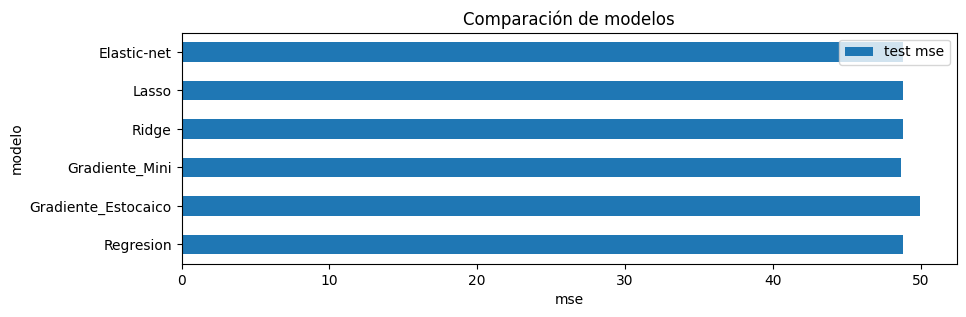

In [52]:
# Comparacion entre modelos
df_comparacion = pd.DataFrame({
                    'modelo': ['Regresion', 'Gradiente_Estocaico', 'Gradiente_Mini', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test mse': [ mse_regresion_simple, mse_gradiente_estocaico, mse_gradiente_mini, mse_ridge, mse_lasso, mse_elastic]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('mse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

In [55]:
df_comparacion.head()



,modelo,test mse
0,Regresion,48.781164
1,Gradiente_Estocaico,49.919149
2,Gradiente_Mini,48.660835
3,Ridge,48.815285
4,Lasso,48.798107


Luego de comparar los distintos modelos de regresion segun su MSE, el mejor modelo (con el error mas bajo) fue el de gradiente mini-batch, sin embargo la diferencia es minima.

#Regresion logistica

## Sin balance

Resultados con regresión logística

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      2351
           1       0.72      0.50      0.59       689

    accuracy                           0.84      3040
   macro avg       0.79      0.72      0.75      3040
weighted avg       0.83      0.84      0.83      3040



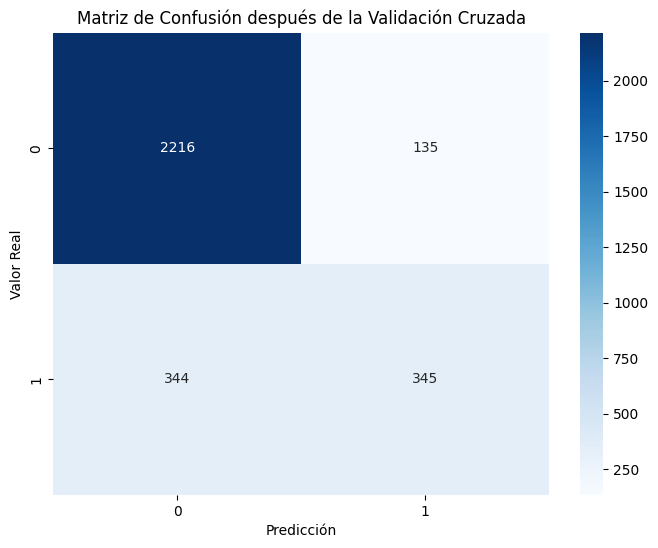

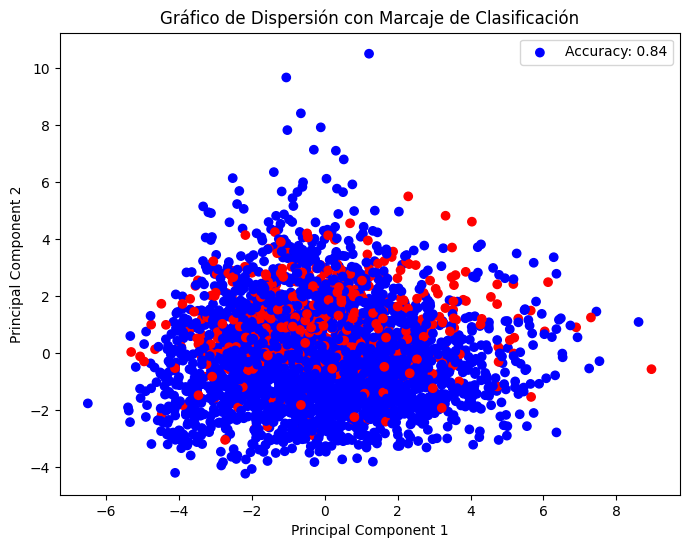

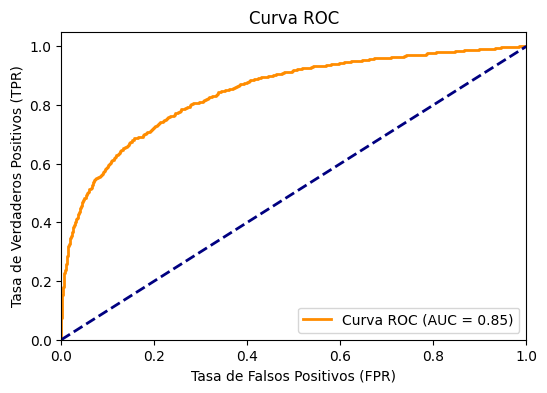

In [56]:
from sklearn.decomposition import PCA
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_C, Y_train_C)
Y_pred = logistic_model.predict(X_test_C)

print("Resultados con regresión logística\n")
print(classification_report(Y_test_C, Y_pred))

# Guardar recall para comparar
precision, recall, f1, support = precision_recall_fscore_support(Y_test_C, Y_pred)
recall_clase_1_sinbalance = recall[1]

#--------# Graficas #--------#
# Matriz de confusión
conf_matrix_cv = confusion_matrix(Y_test_C, Y_pred)

# Crear un mapa de calor de la matriz de confusión en cantidad de datos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(Y_test_C), yticklabels=np.unique(Y_test_C))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión después de la Validación Cruzada')
plt.show()

# Predicciones del modelo
Y_pred = logistic_model.predict(X_test_C)

# Aplicar PCA solo a las características de prueba
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_C)

# Calcular la precisión del modelo
accuracy = accuracy_score(Y_test_C, Y_pred)

# Crear un arreglo de colores según si la predicción fue correcta o incorrecta
colors = ['blue' if y_true == y_pred else 'red' for y_true, y_pred in zip(Y_test_C, Y_pred)]

# Scatter plot con colores según clasificación correcta o incorrecta
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=colors, cmap='viridis', label=f'Accuracy: {accuracy:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gráfico de Dispersión con Marcaje de Clasificación')
plt.legend()
plt.show()

# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test_C)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test_C, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Probando distintos balances

### Balance en el modelo

Resultados con regresión logística

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2351
           1       0.49      0.76      0.60       689

    accuracy                           0.77      3040
   macro avg       0.70      0.77      0.72      3040
weighted avg       0.82      0.77      0.78      3040



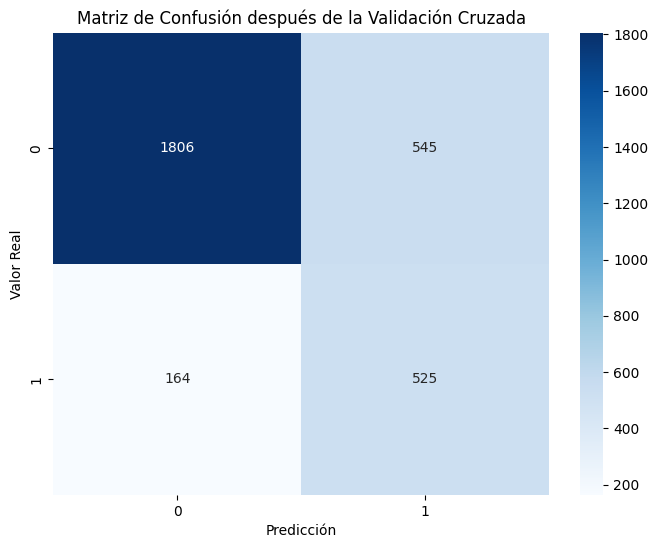

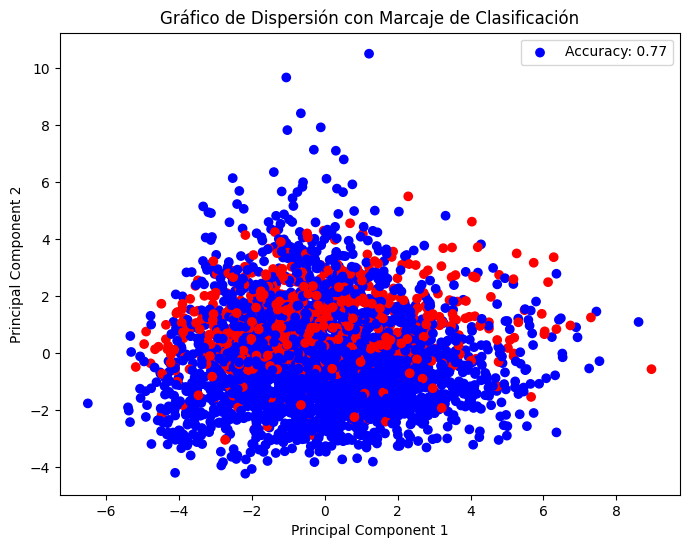

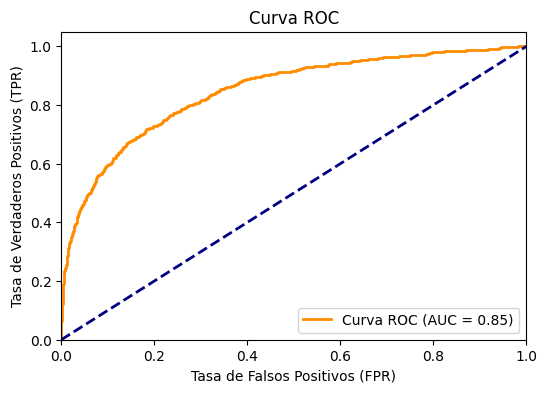

In [57]:
logistic_model = LogisticRegression(random_state=42, class_weight='balanced')
logistic_model.fit(X_train_C, Y_train_C)
Y_pred = logistic_model.predict(X_test_C)

print("Resultados con regresión logística\n")
print(classification_report(Y_test_C, Y_pred))

# Guardar recall para comparar
precision, recall, f1, support = precision_recall_fscore_support(Y_test_C, Y_pred)
recall_clase_1_balanced = recall[1]

#--------# Graficas #--------#
# Matriz de confusión
conf_matrix_cv = confusion_matrix(Y_test_C, Y_pred)

# Crear un mapa de calor de la matriz de confusión en cantidad de datos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(Y_test_C), yticklabels=np.unique(Y_test_C))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión después de la Validación Cruzada')
plt.show()

# Predicciones del modelo
Y_pred = logistic_model.predict(X_test_C)

# Aplicar PCA solo a las características de prueba
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_C)

# Calcular la precisión del modelo
accuracy = accuracy_score(Y_test_C, Y_pred)

# Crear un arreglo de colores según si la predicción fue correcta o incorrecta
colors = ['blue' if y_true == y_pred else 'red' for y_true, y_pred in zip(Y_test_C, Y_pred)]

# Scatter plot con colores según clasificación correcta o incorrecta
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=colors, cmap='viridis', label=f'Accuracy: {accuracy:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gráfico de Dispersión con Marcaje de Clasificación')
plt.legend()
plt.show()

# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test_C)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test_C, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Balance SMOTE

Resultados regresión logística con SMOTE:

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      2351
           1       0.49      0.75      0.59       689

    accuracy                           0.77      3040
   macro avg       0.70      0.76      0.71      3040
weighted avg       0.82      0.77      0.78      3040



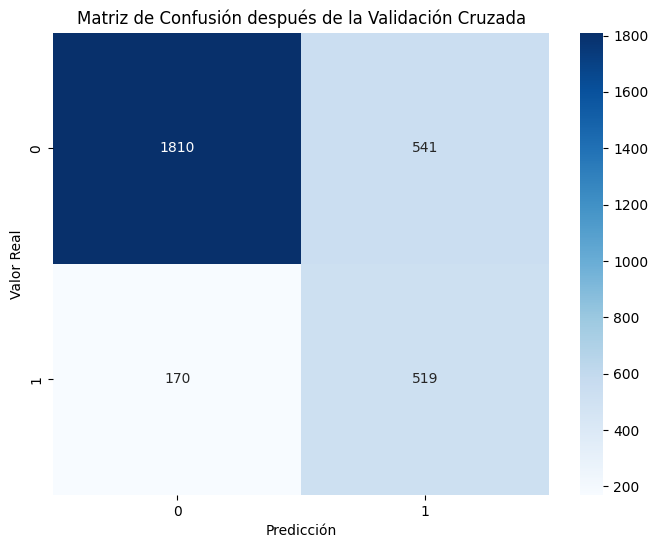

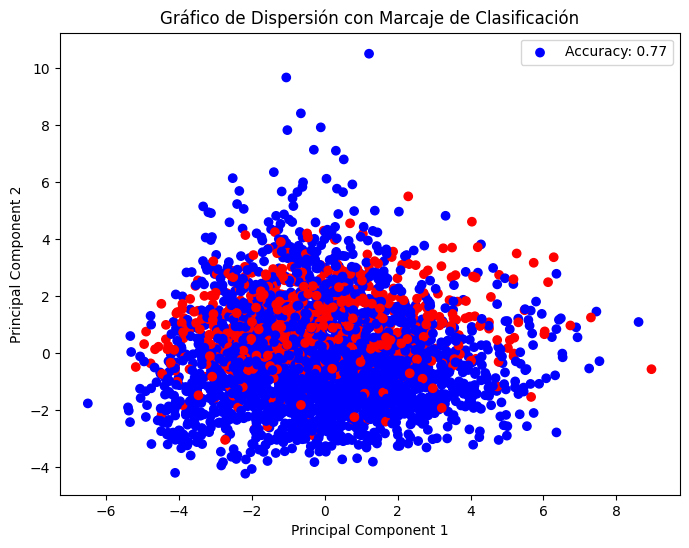

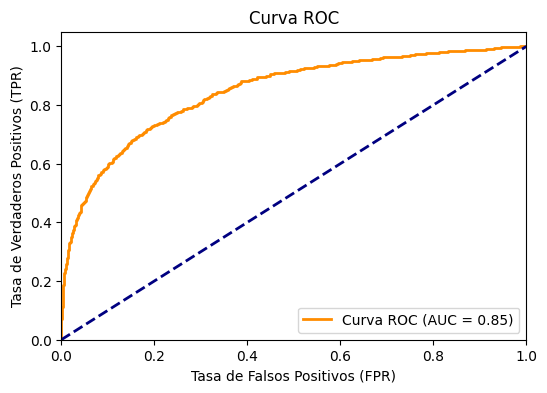

In [58]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_C, Y_train_C)

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_resampled, Y_train_resampled)
Y_pred = logistic_model.predict(X_test_C)

print("Resultados regresión logística con SMOTE:\n")
print(classification_report(Y_test_C, Y_pred))

# Guardar recall para comparar
precision, recall, f1, support = precision_recall_fscore_support(Y_test_C, Y_pred)
recall_clase_1_SMOTE = recall[1]

#--------# Graficas #--------#
# Matriz de confusión
conf_matrix_cv = confusion_matrix(Y_test_C, Y_pred)

# Crear un mapa de calor de la matriz de confusión en cantidad de datos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(Y_test_C), yticklabels=np.unique(Y_test_C))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión después de la Validación Cruzada')
plt.show()

# Predicciones del modelo
Y_pred = logistic_model.predict(X_test_C)

# Aplicar PCA solo a las características de prueba
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_C)

# Calcular la precisión del modelo
accuracy = accuracy_score(Y_test_C, Y_pred)

# Crear un arreglo de colores según si la predicción fue correcta o incorrecta
colors = ['blue' if y_true == y_pred else 'red' for y_true, y_pred in zip(Y_test_C, Y_pred)]

# Scatter plot con colores según clasificación correcta o incorrecta
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=colors, cmap='viridis', label=f'Accuracy: {accuracy:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gráfico de Dispersión con Marcaje de Clasificación')
plt.legend()
plt.show()

# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test_C)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test_C, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Balance oversampler

Resultados regresión logística con Oversampling:

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2351
           1       0.49      0.77      0.60       689

    accuracy                           0.77      3040
   macro avg       0.70      0.77      0.72      3040
weighted avg       0.82      0.77      0.78      3040



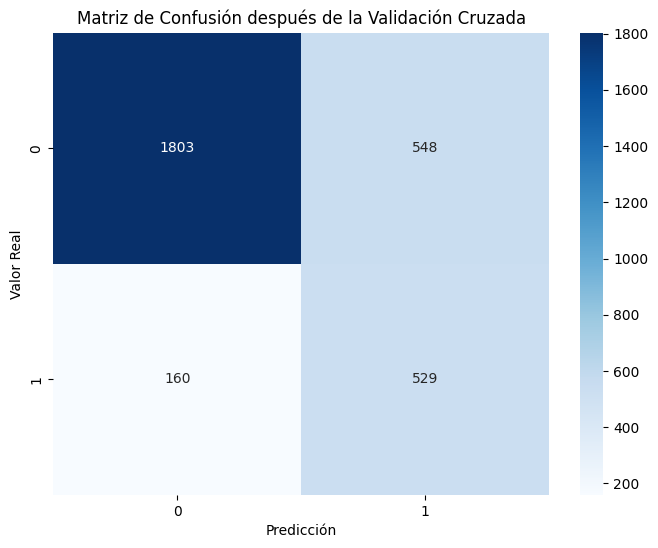

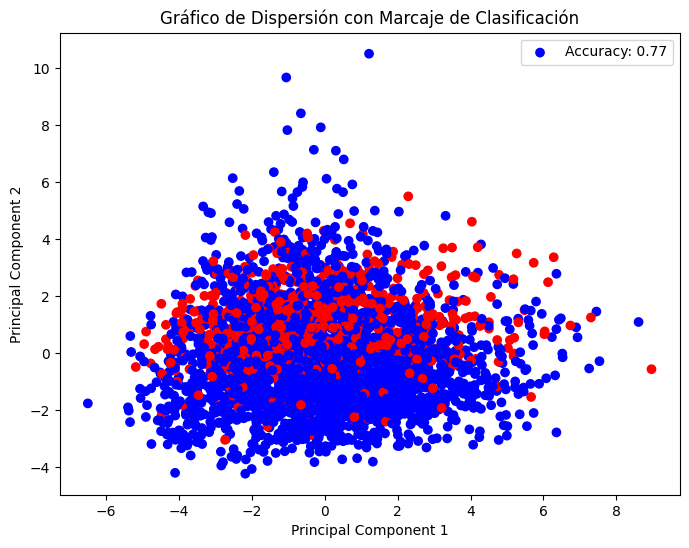

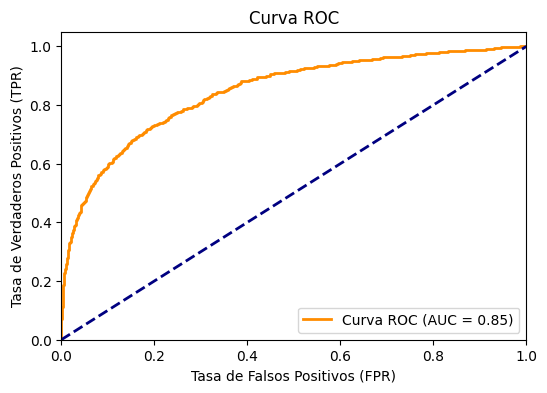

In [59]:
oversampler = RandomOverSampler(random_state=42)
X_resampled, Y_resampled = oversampler.fit_resample(X_train_C, Y_train_C)

logistic_model1 = LogisticRegression(random_state=42)
logistic_model1.fit(X_resampled, Y_resampled)
Y_pred = logistic_model1.predict(X_test_C)

print("Resultados regresión logística con Oversampling:\n")
print(classification_report(Y_test_C, Y_pred))

# Guardar recall para comparar
precision, recall, f1, support = precision_recall_fscore_support(Y_test_C, Y_pred)
recall_clase_1_Oversampling = recall[1]

#--------# Graficas #--------#
# Matriz de confusión
conf_matrix_cv = confusion_matrix(Y_test_C, Y_pred)

# Crear un mapa de calor de la matriz de confusión en cantidad de datos
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cv, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=np.unique(Y_test_C), yticklabels=np.unique(Y_test_C))
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión después de la Validación Cruzada')
plt.show()

# Predicciones del modelo
Y_pred = logistic_model.predict(X_test_C)

# Aplicar PCA solo a las características de prueba
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_C)

# Calcular la precisión del modelo
accuracy = accuracy_score(Y_test_C, Y_pred)

# Crear un arreglo de colores según si la predicción fue correcta o incorrecta
colors = ['blue' if y_true == y_pred else 'red' for y_true, y_pred in zip(Y_test_C, Y_pred)]

# Scatter plot con colores según clasificación correcta o incorrecta
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=colors, cmap='viridis', label=f'Accuracy: {accuracy:.2f}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Gráfico de Dispersión con Marcaje de Clasificación')
plt.legend()
plt.show()

# Obtengo las probabilidades de predicción del modelo
Y_probs = logistic_model.predict_proba(X_test_C)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test_C, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

## Comparacion de RECALL entre modelos de regresion logistica

,modelo,test mse
0,Sin_balance,0.500726
1,Balanceado,0.761974
2,Tecnica_SMOTE,0.753266
3,Tecnica_Oversampling,0.767779


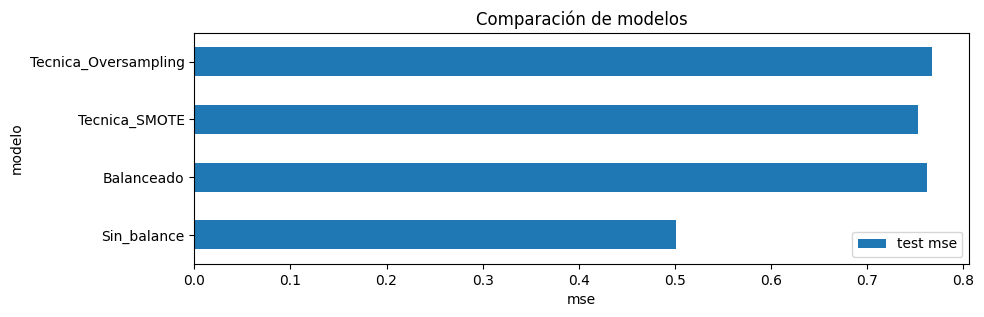

In [60]:
# Comparacion entre modelos
df_comparacion = pd.DataFrame({
                    'modelo': ['Sin_balance', 'Balanceado', 'Tecnica_SMOTE', 'Tecnica_Oversampling'],
                    'test mse': [recall_clase_1_sinbalance, recall_clase_1_balanced, recall_clase_1_SMOTE, recall_clase_1_Oversampling]
                 })

fig, ax = plt.subplots(figsize=(10, 3))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('mse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

df_comparacion.head()

#### NOTA

Consideramos a Recall la metrica ideal para comparar porque queremos darle importancia a que el modelo clasifique correctamente los casos de lluvia siendo esta la clase 1.

La diferencia entre los distintos metodos de balance de clases es muy baja, siendo la mas alta la tecnica Oversampling.



# Modelo BASE


## Regresion

Error cuadrático medio en entrenamiento: 47.98702295555537
Error cuadrático medio en predicciones: 53.890473154448244
Error absoluto medio en predicciones: 3.3034487032294475
Intercept: [6.48548651]
Coeficientes: [[-0.60437729]]
R2: 0.08484286882000747


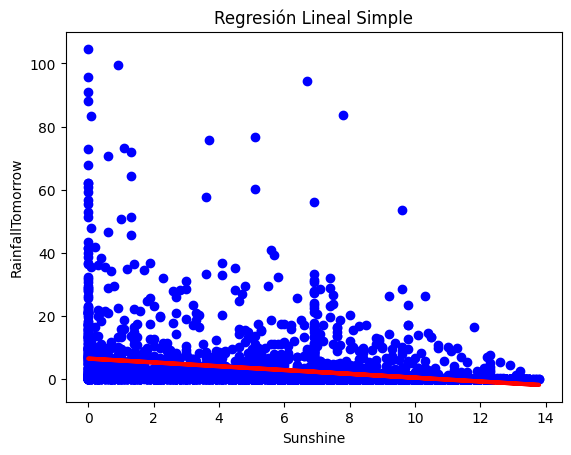

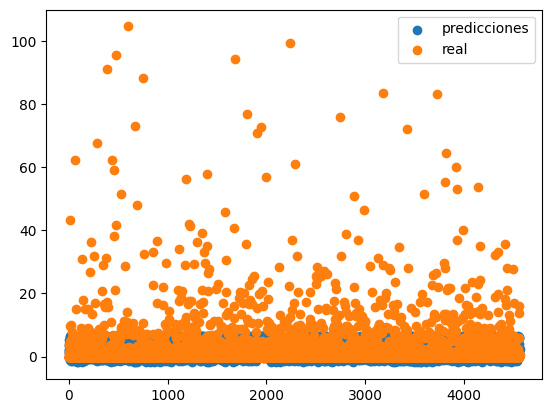

In [66]:
# Extraer los valores de Sunshine y RainfallTomorrow
x = np.array(df_regresion['Sunshine']).reshape(-1, 1)
y = np.array(df_categorica['RainfallTomorrow']).reshape(-1, 1)

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=12)

# Modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, Y_train)

# Hacer predicciones sobre el conjunto de prueba
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)


# Visualiza los resultados

# Evaluar el modelo
print('Error cuadrático medio en entrenamiento:', metrics.mean_squared_error(Y_train, predictions_train))
print('Error cuadrático medio en predicciones:', metrics.mean_squared_error(Y_test, predictions_test))
print('Error absoluto medio en predicciones:', mean_absolute_error(Y_test, predictions_test))
print('Intercept:', model.intercept_)
print('Coeficientes:', model.coef_)
print('R2:', model.score(X_test, Y_test))

plt.scatter(X_test, Y_test, color='blue')
plt.plot(X_test, predictions_test, color='red', linewidth=3)
plt.xlabel('Sunshine')
plt.ylabel('RainfallTomorrow')
plt.title('Regresión Lineal Simple')
plt.show()

x=range(len(Y_test))
plt.scatter(x, y=predictions_test, label='predicciones')
plt.scatter(x, y=Y_test, label='real')
plt.legend()

## Clasificacion

Accuracy: 0.7667763157894737
Confusion Matrix:
 [[1806  545]
 [ 164  525]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.77      0.84      2351
           1       0.49      0.76      0.60       689

    accuracy                           0.77      3040
   macro avg       0.70      0.77      0.72      3040
weighted avg       0.82      0.77      0.78      3040



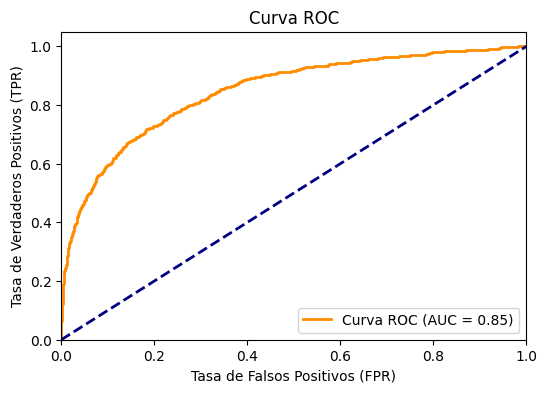

In [69]:
# Crea y entrena el modelo de regresión logística
model = LogisticRegression(random_state=42, class_weight='balanced')
model.fit(X_train_C, Y_train_C.ravel())  # Usar ravel() para evitar un warning y garantizar que sea un array unidimensional

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test_C)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(Y_test_C, y_pred)  # Usar Y_test en lugar de y_test
conf_matrix = confusion_matrix(Y_test_C, y_pred)
class_report = classification_report(Y_test_C, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# Obtengo las probabilidades de predicción del modelo
Y_probs = model.predict_proba(X_test_C)[:, 1]

# Calculo la ROC y el AUC
fpr, tpr, thresholds = roc_curve(Y_test_C, Y_probs)
roc_auc = auc(fpr, tpr)

# Grafico la curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# Redes neuronales

In [108]:
def boxplots(X,y, columns):
  data = pd.concat([pd.DataFrame(y, columns=['target']), pd.DataFrame(X, columns=columns)], axis=1)

  num_features = X.shape[1]
  num_rows = num_features // 3 + 1

  fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
  fig.subplots_adjust(hspace=0.5)

  # Se recorre cada feature para generar su diagrama de caja respecto de la salida
  for i, feature in enumerate(data.columns[1:]):
      row = i // 3
      col = i % 3
      sns.boxplot(x='target', y=feature, data=data, ax=axes[row, col])
      axes[row, col].set_title(f'Diagrama de caja de {feature}')
      axes[row, col].set_xlabel('Target')
      axes[row, col].set_ylabel(feature)

  # Eliminar subplots vacíos si es necesario
  if num_features % 3 != 0:
      for i in range(num_features % 3, 3):
          fig.delaxes(axes[num_rows - 1, i])

  plt.show()

##Red neuronal para clasificacion

In [147]:
# Assuming X_train_C, X_test_C, Y_train_one_hot, and Y_test_one_hot are defined
# Encode the target variable to integers
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train_C.ravel())
Y_test_encoded = label_encoder.transform(Y_test_C.ravel())

# Convert integers to one-hot encoded format
Y_train_one_hot = to_categorical(Y_train_encoded)
Y_test_one_hot = to_categorical(Y_test_encoded)

num_classes = len(df_categorica['RainTomorrow'].unique())
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_C.shape[1],)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_C, Y_train_one_hot, epochs=5, batch_size=32, validation_data=(X_test_C, Y_test_one_hot))
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

# Obtain the predicted classes
predictions = probabilities.argmax(axis=-1)

# Convert one-hot encoded Y_test to numeric labels (assuming Y_test is one-hot encoded)
Y_test_numeric = np.argmax(Y_test_one_hot, axis=1)

# Calculate metrics
accuracy = accuracy_score(Y_test_numeric, predictions)
precision = precision_score(Y_test_numeric, predictions, average='weighted')
recall = recall_score(Y_test_numeric, predictions, average='weighted')
f1 = f1_score(Y_test_numeric, predictions, average='weighted')
r2 = r2_score(Y_test_numeric, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'F1-score: {f1}')
print(f'R-squared (R²): {r2}')

Epoch 1/5
380/380 [==============================] - 3s 5ms/step - loss: 0.4038 - accuracy: 0.8184 - val_loss: 0.3742 - val_accuracy: 0.8454
Epoch 2/5
380/380 [==============================] - 2s 5ms/step - loss: 0.3727 - accuracy: 0.8404 - val_loss: 0.3680 - val_accuracy: 0.8484
Epoch 3/5
380/380 [==============================] - 2s 4ms/step - loss: 0.3679 - accuracy: 0.8417 - val_loss: 0.3641 - val_accuracy: 0.8510
Epoch 4/5
380/380 [==============================] - 2s 4ms/step - loss: 0.3630 - accuracy: 0.8429 - val_loss: 0.3655 - val_accuracy: 0.8503
Epoch 5/5
380/380 [==============================] - 2s 4ms/step - loss: 0.3601 - accuracy: 0.8416 - val_loss: 0.3591 - val_accuracy: 0.8536
Accuracy: 0.68125
Precision: 0.6514414130140384
Recall: 0.68125
F1-score: 0.6647381227126774
F1-score: 0.6647381227126774
R-squared (R²): -0.8185511029182528


###Hiperparametros

In [148]:
# Dividir los datos en conjunto de entrenamiento y de prueba

X_train, X_test, Y_train, Y_test = train_test_split(
    df_regresion,
    regresion['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=12)

# Ajustar el scaler a los datos y transformarlos
X_train_C = scaler.fit_transform(X_train_C)
X_test_C = scaler.transform(X_test_C)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir las etiquetas a formato categórico one-hot
num_classes = len(set(df_regresion))  # Asumiendo que Y contiene etiquetas categóricas
Y_train_categorical = to_categorical(Y_train, num_classes=num_classes)
Y_test_categorical = to_categorical(Y_test, num_classes=num_classes)

# Función objetivo para Optuna
def objective(trial):
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_neurons = trial.suggest_int('num_neurons', 32, 128)

    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    for i in range(num_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_scaled, Y_train_categorical, epochs=10, batch_size=32, verbose=0)

    score = model.evaluate(X_test_scaled, Y_test_categorical, verbose=0)
    return score[1]  # Devuelve la precisión del modelo como la métrica objetivo

# Crea un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Imprime los mejores hiperparámetros encontrados
print('Mejor combinación de hiperparámetros:')
print(study.best_params)


[I 2023-12-09 21:01:01,408] A new study created in memory with name: no-name-d7b79fce-c248-430e-adc5-2f5e4b90cc59
[I 2023-12-09 21:01:23,662] Trial 0 finished with value: 0.8592105507850647 and parameters: {'num_layers': 2, 'num_neurons': 109}. Best is trial 0 with value: 0.8592105507850647.
[I 2023-12-09 21:01:45,276] Trial 1 finished with value: 0.8542762994766235 and parameters: {'num_layers': 3, 'num_neurons': 72}. Best is trial 0 with value: 0.8592105507850647.
[I 2023-12-09 21:01:58,081] Trial 2 finished with value: 0.8470394611358643 and parameters: {'num_layers': 2, 'num_neurons': 49}. Best is trial 0 with value: 0.8592105507850647.
[I 2023-12-09 21:02:19,471] Trial 3 finished with value: 0.8555921316146851 and parameters: {'num_layers': 2, 'num_neurons': 52}. Best is trial 0 with value: 0.8592105507850647.
[I 2023-12-09 21:02:32,042] Trial 4 finished with value: 0.8529605269432068 and parameters: {'num_layers': 2, 'num_neurons': 80}. Best is trial 0 with value: 0.8592105507850

Mejor combinación de hiperparámetros:
{'num_layers': 2, 'num_neurons': 109}


###Explicabilidad

In [131]:
feature_names=df_categorica.drop('RainfallTomorrow',axis=1).columns.values
feature_names
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(
    df_categorica.drop('RainTomorrow',axis=1),
    df_categorica['RainTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=42
)
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
# Initializing and training the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, Y_train.reshape(len(Y_train),))



LogisticRegression()

In [133]:
# Making predictions
y_pred = model.predict(X_test_scaled)
y_ajuste_train = model.predict(X_train_scaled)

# Metrics on the training set
print('Metrics on the training set')
print(classification_report(Y_train, y_ajuste_train))
print(confusion_matrix(Y_train, y_ajuste_train))

# Metrics on the test set (corrected typo in variable name Y_pred -> y_pred)
print('Metrics on the test set')
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))

Metrics on the training set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9305
           1       1.00      0.96      0.98      2854

    accuracy                           0.99     12159
   macro avg       0.99      0.98      0.99     12159
weighted avg       0.99      0.99      0.99     12159

[[9302    3]
 [ 122 2732]]
Metrics on the test set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2338
           1       1.00      0.96      0.98       702

    accuracy                           0.99      3040
   macro avg       0.99      0.98      0.99      3040
weighted avg       0.99      0.99      0.99      3040

[[2338    0]
 [  25  677]]


In [134]:
# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(model, X_train_scaled, feature_names=feature_names)
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_scaled)
explainer.expected_value

1.5383468722955078

####Local

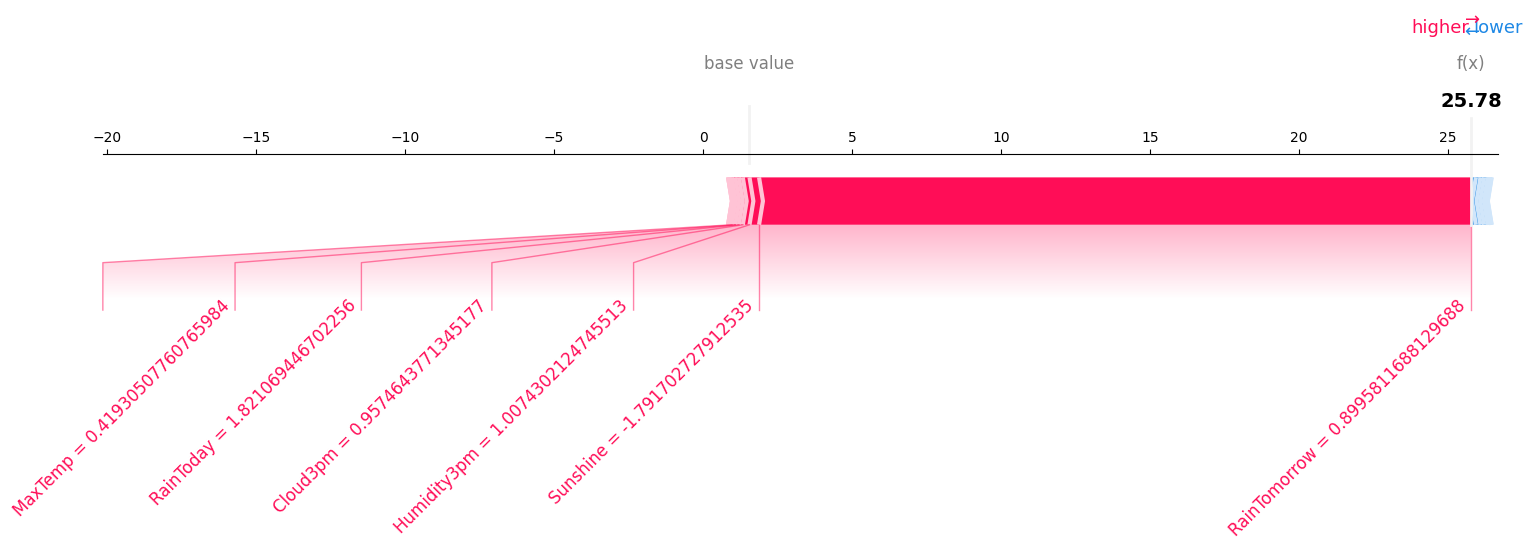

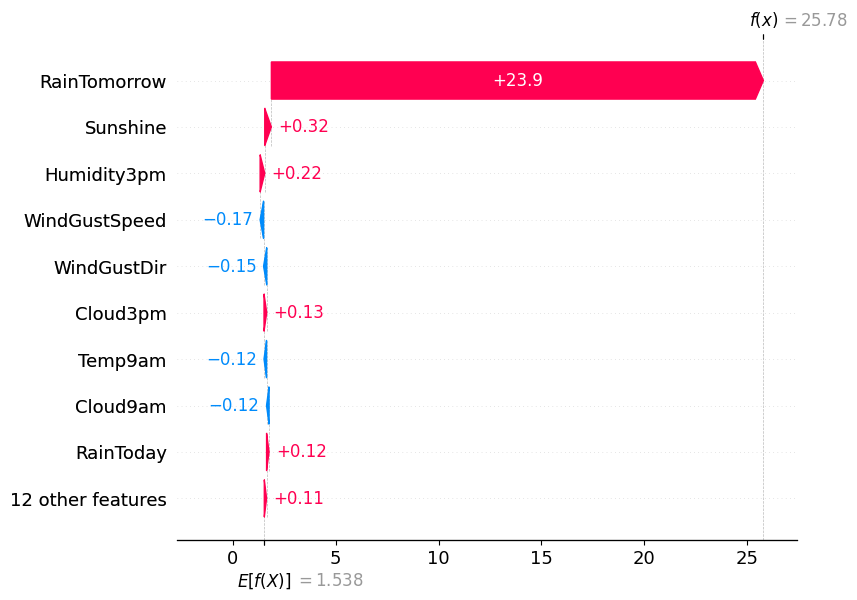

In [136]:
index=0
model.predict_proba(X_test_scaled)[index]
model.predict(X_test_scaled)[index]
shap_values[index]
explanation = shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, feature_names=feature_names)
shap.force_plot(explainer.expected_value, explanation.values, X_test_scaled[index], feature_names=feature_names, matplotlib=True, figsize=(18, 4), \
                text_rotation=45)
shap.plots.waterfall(explanation)

####Global

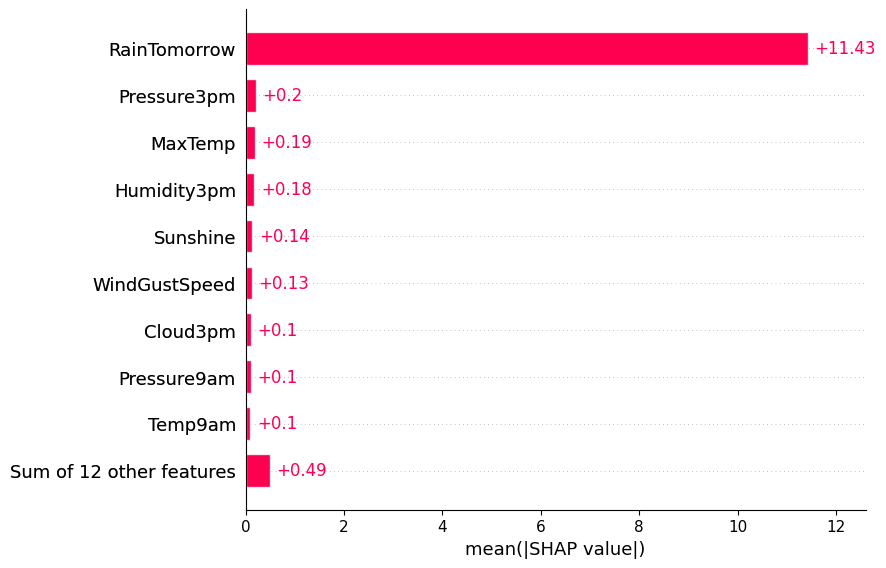

In [138]:
explanation = shap.Explanation(values=shap_values, base_values=explainer.expected_value, feature_names=feature_names, data=X_test)
shap.plots.bar(explanation)


#Red neuronal para Regresion

In [149]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X = df_categorica.drop(['RainTomorrow', 'RainfallTomorrow'], axis=1)  # Características
Y = df_categorica['RainfallTomorrow']  # Etiquetas

In [150]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir las etiquetas a valores numéricos (0, 1, 2, ...)
Y_train_numeric = Y_train.astype('category').cat.codes
Y_test_numeric = Y_test.astype('category').cat.codes


# Modelo de red neuronal
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(num_classes, activation='softmax'))  # Capa de salida con el número correcto de clases

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled, Y_train_categorical, epochs=5, batch_size=32, validation_data=(X_test_scaled, Y_test_categorical))

Epoch 1/5
380/380 [==============================] - 2s 5ms/step - loss: 0.6434 - accuracy: 0.7891 - val_loss: 0.3807 - val_accuracy: 0.8451
Epoch 2/5
380/380 [==============================] - 2s 5ms/step - loss: 0.3812 - accuracy: 0.8386 - val_loss: 0.3658 - val_accuracy: 0.8507
Epoch 3/5
380/380 [==============================] - 1s 3ms/step - loss: 0.3718 - accuracy: 0.8381 - val_loss: 0.3633 - val_accuracy: 0.8487
Epoch 4/5
380/380 [==============================] - 1s 4ms/step - loss: 0.3669 - accuracy: 0.8405 - val_loss: 0.3607 - val_accuracy: 0.8536
Epoch 5/5
380/380 [==============================] - 2s 4ms/step - loss: 0.3630 - accuracy: 0.8407 - val_loss: 0.3626 - val_accuracy: 0.8510


In [151]:
# Obtener las probabilidades de predicción en el conjunto de prueba
probabilities = model.predict(X_test_scaled)

# Obtener las clases resultantes (índice del valor máximo en cada fila)
predictions = probabilities.argmax(axis=-1)

# Calcular métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test_numeric, predictions)
precision = precision_score(Y_test_numeric, predictions, average='weighted')
recall = recall_score(Y_test_numeric, predictions, average='weighted')
f1 = f1_score(Y_test_numeric, predictions, average='weighted')
r2 = r2_score(Y_test_categorical, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f"Coef (R²): {r2}")

95/95 [==============================] - 0s 2ms/step
Accuracy: 0.624671052631579
Precision: 0.47928340695125915
Recall: 0.624671052631579
F1-score: 0.5416730765244647
Coef (R²): 0.03632245982582735


## Hiperparametros

In [152]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir las etiquetas a formato categórico one-hot
num_classes = len(set(Y))  # Asumiendo que Y contiene etiquetas categóricas
Y_train_categorical = to_categorical(Y_train, num_classes=num_classes)
Y_test_categorical = to_categorical(Y_test, num_classes=num_classes)

# Función objetivo para Optuna
def objective(trial):
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_neurons = trial.suggest_int('num_neurons', 32, 128)

    model = Sequential()
    model.add(Dense(num_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    for i in range(num_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train_scaled, Y_train_categorical, epochs=10, batch_size=32, verbose=0)

    score = model.evaluate(X_test_scaled, Y_test_categorical, verbose=0)
    return score[1]  # Devuelve la precisión del modelo como la métrica objetivo

# Crea un estudio de Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Imprime los mejores hiperparámetros encontrados
print('Mejor combinación de hiperparámetros:')
print(study.best_params)

[I 2023-12-09 21:05:37,022] A new study created in memory with name: no-name-fe830abe-5fb5-4e9d-8b74-7417d2258b01
[I 2023-12-09 21:05:51,494] Trial 0 finished with value: 0.7562500238418579 and parameters: {'num_layers': 3, 'num_neurons': 124}. Best is trial 0 with value: 0.7562500238418579.
[I 2023-12-09 21:06:12,927] Trial 1 finished with value: 0.7572368383407593 and parameters: {'num_layers': 1, 'num_neurons': 52}. Best is trial 1 with value: 0.7572368383407593.
[I 2023-12-09 21:06:27,332] Trial 2 finished with value: 0.75789475440979 and parameters: {'num_layers': 3, 'num_neurons': 49}. Best is trial 2 with value: 0.75789475440979.
[I 2023-12-09 21:06:39,724] Trial 3 finished with value: 0.7588815689086914 and parameters: {'num_layers': 1, 'num_neurons': 128}. Best is trial 3 with value: 0.7588815689086914.
[I 2023-12-09 21:06:55,071] Trial 4 finished with value: 0.7588815689086914 and parameters: {'num_layers': 3, 'num_neurons': 47}. Best is trial 3 with value: 0.7588815689086914

Mejor combinación de hiperparámetros:
{'num_layers': 1, 'num_neurons': 128}


In [153]:
# Obtener las probabilidades de predicción en el conjunto de prueba
probabilities = model.predict(X_test_scaled)

# Obtener las clases resultantes (índice del valor máximo en cada fila)
predictions = probabilities.argmax(axis=-1)

# Calcular métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(Y_test_numeric, predictions)
precision = precision_score(Y_test_numeric, predictions, average='weighted')
recall = recall_score(Y_test_numeric, predictions, average='weighted')
f1 = f1_score(Y_test_numeric, predictions, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f"Coef (R²): {r2}")

95/95 [==============================] - 0s 2ms/step
Accuracy: 0.5345394736842105
Precision: 0.41145804440075473
Recall: 0.5345394736842105
F1-score: 0.46418824420726684
Coef (R²): 0.03632245982582735


## Explicabilidad

In [156]:
feature_names=df_categorica.drop('RainfallTomorrow',axis=1).columns.values
feature_names
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(
    df_categorica.drop('RainfallTomorrow',axis=1),
    df_categorica['RainfallTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=42
)
# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [161]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(
    df_categorica.drop('RainfallTomorrow', axis=1),
    df_categorica['RainfallTomorrow'].values.reshape(-1, 1),
    test_size=0.2,
    random_state=42
)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing and training a neural network for regression
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(X_train_scaled.shape[1],)))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, Y_train, epochs=5, batch_size=32, validation_data=(X_test_scaled, Y_test))

Epoch 1/5
380/380 [==============================] - 2s 5ms/step - loss: 53.6242 - val_loss: 58.6797
Epoch 2/5
380/380 [==============================] - 1s 3ms/step - loss: 47.6725 - val_loss: 53.6924
Epoch 3/5
380/380 [==============================] - 1s 3ms/step - loss: 44.4106 - val_loss: 50.6726
Epoch 4/5
380/380 [==============================] - 1s 3ms/step - loss: 42.1854 - val_loss: 48.4838
Epoch 5/5
380/380 [==============================] - 1s 3ms/step - loss: 40.5019 - val_loss: 46.7919


In [160]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(Y_train, y_ajuste_train)
mse_test = mean_squared_error(Y_test, y_pred)

print(f'Mean Squared Error (MSE) on training set: {mse_train}')
print(f'Mean Squared Error (MSE) on test set: {mse_test}')

Mean Squared Error (MSE) on training set: 38.961927364971885
Mean Squared Error (MSE) on test set: 45.75071704371089


In [163]:
# Crea un objeto explainer SHAP para una red neuronal (DeepExplainer)
explainer = shap.DeepExplainer(model, X_train_scaled)
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(X_test_scaled)

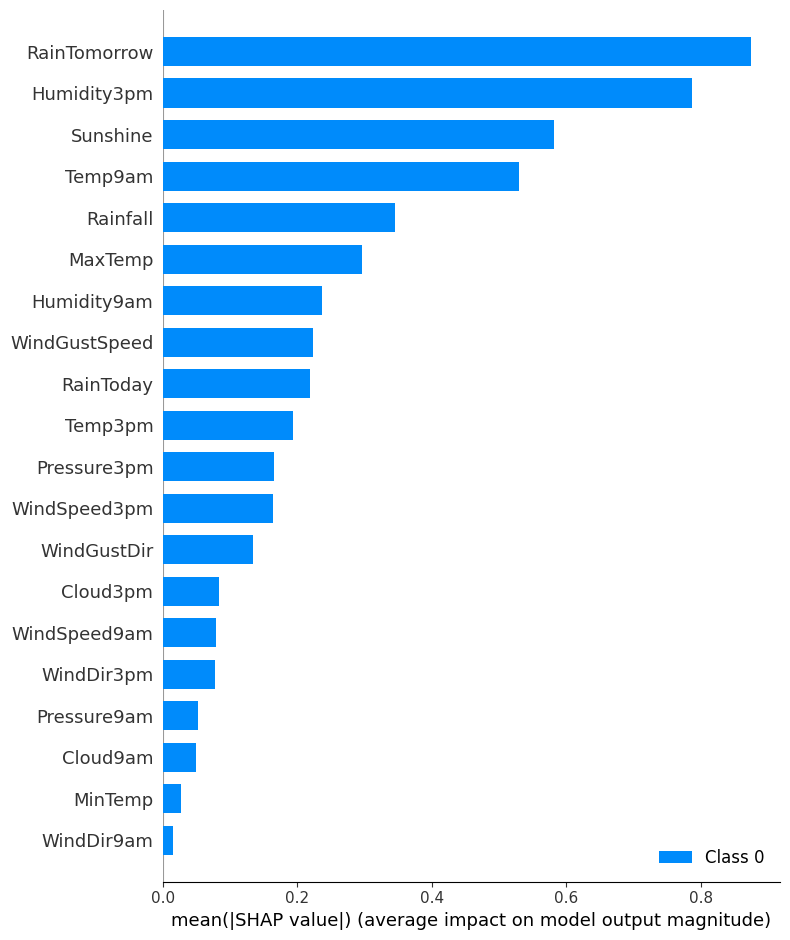

In [167]:
# Crear una gráfica de valores globales de SHAP
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)

#MLOps

##app_clima.ipynb

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import datasets
import joblib

df = pd.read_csv("weatherAUS.csv", delimiter=",")

def FunctionTransformer(df):#funcion para actualizar dataframe
  dff=df.copy()
  localidades = ["SydneyAirport", "Sydney", "Canberra", "Melbourne", "MelbourneAirport" ]

  dff= dff[dff['Location'].isin(localidades)]
  dff = dff.dropna(subset=['RainTomorrow', 'RainfallTomorrow'])

  dff = df.drop('Location', axis=1)
  def rellenar(t):
      for columna in t.columns:

          # Verifica si la columna tiene datos faltantes
          if t[columna].isnull().any():

              # Si es numérica y continua, rellena con el promedio
              if pd.api.types.is_numeric_dtype(t[columna]) and not pd.api.types.is_integer_dtype(t[columna]):
                  t[columna].fillna(t[columna].mean(), inplace=True)

              # Si es numérica y discreta, rellena con la moda
              elif pd.api.types.is_numeric_dtype(t[columna]):
                  t[columna].fillna(t[columna].mode()[0], inplace=True)

            # Si es categórica, rellena con la moda
              else:
                  t[columna].fillna(t[columna].mode()[0], inplace=True)

      return t
  dff = rellenar(dff)
  dff =  dff.reset_index(drop = True)
  columnas_categoricas = dff.select_dtypes(exclude='number').columns
  le = LabelEncoder()
  for categorica in columnas_categoricas:
    dff[categorica] = le.fit_transform(dff[categorica])
  dff = dff.replace([np.inf, -np.inf], 0)
  dff.drop('Unnamed: 0', axis=1, inplace=True)
  dff.drop('Date', axis=1, inplace=True)


  return dff
dff=FunctionTransformer(df)


X = dff.drop(['RainTomorrow', 'RainfallTomorrow'], axis=1)
y = dff['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # esto simplemente imputa por la media.
    ('scaler', StandardScaler()),  # se realiza una estandarización.
    ('model', LogisticRegression())  # se entrena un modelo de regresión lineal.
])

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, 'clima_pipeline.joblib')

##app_clima.py

In [ ]:
import streamlit as st
import numpy as np
import joblib

st.title('Predicción del clima')

pipeline_entrenado = joblib.load('clima_pipeline.joblib')

#variables
MinTemp = st.slider('MinTemp', -4.8, 29.7, 13.18)
MaxTemp = st.slider('MaxTemp', 6.6, 47.3, 23.75)
Rainfall = st.slider('Rainfall', 0.0, 371.0, 2.7)
Evaporation = st.slider('Evaporation', 0.0, 145.0, 5.62)
Sunshine = st.slider('Sunshine', 0.0, 14.10, 7.58)
WindGustDir = st.slider('WindGustDir', 0.0, 15.0, 7.28)
WindGustSpeed = st.slider('WindGustSpeed', 7.0, 135.0, 38.92)
WindDir9am = st.slider('WindDir9am', 0.0, 15.0, 8.2)
WindSpeed3pm = st.slider('WindSpeed3pm', 0.0, 15.0, 7.12)
WindSpeed9am = st.slider('WindSpeed9am', 0.0, 130.0, 13.15)
WindSpeed3pm = st.slider('WindSpeed3pm', 4.0, 8.0, 5.0)
Humidity9am = st.slider('Humidity9am', 2.0, 4.5, 3.0)
Humidity3pm = st.slider('Humidity3pm', 1.0, 100.0, 52.6)
Pressure9am = st.slider('Pressure9am', 980.5, 1039.9, 1018.29)
Pressure3pm = st.slider('Pressure3pm', 979.0, 1037.8, 1015.75)
Cloud9am = st.slider('Cloud9am', 0.0, 9.0, 4.36)
Cloud3am = st.slider('Cloud3am', 0.0, 8.0, 4.44)
Temp9am = st.slider('Temp9am', 0.0, 37.7, 17.68)
Temp3pm = st.slider('Temp3pm', 6.0, 46.7, 22.28)
RainToday = st.slider('RainToday', 0.0, 1.0, 0.22)

# Agregar un botón para predecir
if st.button('Predict'):
    data_para_predecir = np.array([[MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindSpeed3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3am,Temp9am,Temp3pm,RainToday]])#se usa array porque entra ese dato a la tuberia

    prediccion = pipeline_entrenado.predict(data_para_predecir)
    st.write('Predicción:', prediccion)

#Conclusion

Hemos recorrido y conocido la implemetación de herramientas de ML. Pudimos experimentar como se comportan las regresiones, como se pueden optimizar los algoritmos y como puede ser utilizada en producto final por el cliente.